In [1]:
###July 19 comments:
#Need to adjust the make_df function so that it skips July 18-20, days when there are no games 
#because of the All-Star break

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import unidecode
import datetime as dt
from datetime import timedelta

In [3]:
#DATA NEEDED (with sample info to demonstrate)
#SP Live Stats
#Odds
#Team Batting Stats vs. each hand
#SP Overall Stats
#Park Factors
#Temp and Wind
#FD and DK Salaries

In [4]:
#Creating variables for today, 
#the day we starting wrangling the data (June 20, 2022) and the difference between today and the start date
today = dt.date.today()
today_filename = str(today).replace('-', '_')

In [5]:
today

datetime.date(2022, 8, 14)

In [6]:
today_filename

'2022_08_14'

In [7]:
#The day we started scraping data
start_date = dt.date(year = 2022, month = 6, day = 20)

In [8]:
difference = today - start_date

In [9]:
difference.days

55

In [10]:
loop_length = 49

In [11]:
opening_day = dt.date(year = 2022, month = 4, day = 7)

In [12]:
opening_day_str = str(opening_day)

In [13]:
#Function to import csvs, create dataframes for each day of games and then concatenate vertically
def make_df(csv_name_str, start_from = 1, loop_length = loop_length):
    """Function that imports csvs from each day and creates a dataframe for each, then concatenates vertically.
    Start paramater indicates whether to start from yesterday or today, and then iterate back to start date. Defaults to 1
    loop_length parameter indicates the time between the first day of available data and the date at the end of the loop.
    Defaults to difference between June 20 and today
    """
    list_of_dfs = []
    for i in range(start_from, loop_length):
        current_date = today - timedelta(days = i)
        current_date_str = str(current_date).replace('-', '_')
        new_df = pd.read_csv(csv_name_str + current_date_str + '.csv')
        #Adding a date column if it doesn't already exist, and then formatting it to datetime
        if 'Date' not in new_df.columns:
            new_df['Date'] = pd.to_datetime(current_date, format = '%Y-%m-%d')
        new_df['Date'] = pd.to_datetime(new_df['Date'], format = '%Y-%m-%d')
        list_of_dfs.append(new_df)
    return pd.concat(list_of_dfs, ignore_index = True)

In [17]:
#Getting dataframe of each pitcher's live stats from each day
sp_live_df = make_df('SPStats_Live_', start_from = 7, loop_length = 56)

In [18]:
sp_live_df.head()

,Unnamed: 0,Name,Team,W,IP,ER,SO,H,BB,CG,HBP,ShO,Date
0,0,Tyler Anderson,LAD,1,7.0,0,3,2,1,0,0,0,2022-08-07
1,1,Zach Davies,ARI,0,5.0,0,3,4,2,0,0,0,2022-08-07
2,2,Kevin Gausman,TOR,0,6.0,0,5,6,0,0,0,0,2022-08-07
3,3,Triston McKenzie,CLE,1,8.0,0,8,2,1,0,0,0,2022-08-07
4,4,Jesus Luzardo,MIA,1,7.0,0,6,1,1,0,0,0,2022-08-07


In [19]:
#Tail should include rows from June 20, the first day we started scraping data
sp_live_df.tail()

,Unnamed: 0,Name,Team,W,IP,ER,SO,H,BB,CG,HBP,ShO,Date
1262,13,Zach Davies,ARI,0,6.0,4,3,4,3,0,0,0,2022-06-20
1263,14,Noah Syndergaard,LAA,0,7.1,5,5,8,2,0,0,0,2022-06-20
1264,15,Alex Faedo,DET,0,4.1,4,2,8,2,0,0,0,2022-06-20
1265,16,Jose Berrios,TOR,0,4.0,6,1,9,1,0,0,0,2022-06-20
1266,17,Caleb Kilian,CHC,0,2.1,5,3,3,5,0,0,0,2022-06-20


In [20]:
sp_live_df[sp_live_df['Name'] == 'Andre Pallante']

,Unnamed: 0,Name,Team,W,IP,ER,SO,H,BB,CG,HBP,ShO,Date
204,6,Andre Pallante,STL,1,8.0,0,8,5,1,0,0,0,2022-07-31
358,22,Andre Pallante,STL,0,4.0,3,4,7,0,0,0,0,2022-07-26
575,18,Andre Pallante,STL,1,5.0,3,5,6,3,0,0,0,2022-07-15


In [21]:
sp_live_df.replace('Neil Pallante', 'Andre Pallante', inplace = True)

In [22]:
sp_live_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [23]:
sp_live_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Name    1267 non-null   object        
 1   Team    1267 non-null   object        
 2   W       1267 non-null   int64         
 3   IP      1267 non-null   float64       
 4   ER      1267 non-null   int64         
 5   SO      1267 non-null   int64         
 6   H       1267 non-null   int64         
 7   BB      1267 non-null   int64         
 8   CG      1267 non-null   int64         
 9   HBP     1267 non-null   int64         
 10  ShO     1267 non-null   int64         
 11  Date    1267 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 118.9+ KB


In [24]:
sp_live_df[sp_live_df['Date'] > '2022-07-17']

,Name,Team,W,IP,ER,SO,H,BB,CG,HBP,ShO,Date
0,Tyler Anderson,LAD,1,7.0,0,3,2,1,0,0,0,2022-08-07
1,Zach Davies,ARI,0,5.0,0,3,4,2,0,0,0,2022-08-07
2,Kevin Gausman,TOR,0,6.0,0,5,6,0,0,0,0,2022-08-07
3,Triston McKenzie,CLE,1,8.0,0,8,2,1,0,0,0,2022-08-07
4,Jesus Luzardo,MIA,1,7.0,0,6,1,1,0,0,0,2022-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...
496,Dummy,XXX,1,8.1,0,10,4,1,0,0,0,2022-07-19
497,Dummy,XXX,1,7.0,0,8,1,2,0,0,0,2022-07-19
498,Dummy,XXX,0,3.0,0,2,1,0,0,0,0,2022-07-18
499,Dummy,XXX,1,8.1,0,10,4,1,0,0,0,2022-07-18


In [25]:
sp_live_df['Name'].value_counts()

Logan Webb           10
Miles Mikolas         9
Patrick Corbin        9
Lance Lynn            9
Jordan Montgomery     9
                     ..
Jerad Eickhoff        1
Erasmo Ramirez        1
Elvin Rodriguez       1
Cole Ragans           1
Tommy Henry           1
Name: Name, Length: 242, dtype: int64

In [26]:
sp_live_df=sp_live_df[sp_live_df['Name'] != 'Dummy']

In [27]:
sp_live_df['Name'].value_counts()

Logan Webb           10
Miles Mikolas         9
Carlos Rodon          9
Lance Lynn            9
Jordan Montgomery     9
                     ..
Jordan Hicks          1
Mark Leiter           1
Andrew Bellatti       1
Zach Eflin            1
Sammy Long            1
Name: Name, Length: 241, dtype: int64

In [28]:
sp_live_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1266
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Name    1258 non-null   object        
 1   Team    1258 non-null   object        
 2   W       1258 non-null   int64         
 3   IP      1258 non-null   float64       
 4   ER      1258 non-null   int64         
 5   SO      1258 non-null   int64         
 6   H       1258 non-null   int64         
 7   BB      1258 non-null   int64         
 8   CG      1258 non-null   int64         
 9   HBP     1258 non-null   int64         
 10  ShO     1258 non-null   int64         
 11  Date    1258 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 127.8+ KB


In [29]:
sp_live_df['Date'].value_counts()

2022-08-06    34
2022-07-02    34
2022-08-02    32
2022-07-23    32
2022-07-16    32
2022-07-13    32
2022-07-31    30
2022-07-30    30
2022-06-26    30
2022-07-29    30
2022-06-25    30
2022-06-24    30
2022-06-21    30
2022-08-07    30
2022-07-26    30
2022-06-22    30
2022-07-03    30
2022-07-05    30
2022-06-28    30
2022-07-09    30
2022-07-24    30
2022-07-10    30
2022-06-29    30
2022-07-12    30
2022-07-27    28
2022-07-08    28
2022-07-22    28
2022-07-06    28
2022-08-05    28
2022-08-03    28
2022-07-04    28
2022-07-15    28
2022-07-01    28
2022-07-07    26
2022-07-14    26
2022-08-04    26
2022-07-25    24
2022-07-17    24
2022-08-01    20
2022-06-23    20
2022-07-28    20
2022-07-11    20
2022-06-20    18
2022-06-27    18
2022-06-30    16
2022-07-21    12
Name: Date, dtype: int64

In [30]:
#Re-order sp_live_df so earliest date is at the top so that we can concat with the pre-June 20 dataframe
sp_live_ordered = sp_live_df.sort_values(by = 'Date', ascending = True)

In [31]:
sp_live_ordered.head()

,Name,Team,W,IP,ER,SO,H,BB,CG,HBP,ShO,Date
1266,Caleb Kilian,CHC,0,2.1,5,3,3,5,0,0,0,2022-06-20
1249,JT Brubaker,PIT,1,6.0,0,5,5,3,0,1,0,2022-06-20
1250,Corbin Burnes,MIL,1,7.0,0,10,2,2,0,0,0,2022-06-20
1251,David Peterson,NYM,1,5.1,0,7,6,2,0,1,0,2022-06-20
1252,Gerrit Cole,NYY,0,7.1,1,12,1,3,0,0,0,2022-06-20


In [32]:
#Dataframe of all starts this season before June 20 so we can calculate average outs recorded per start
all_starts_df = pd.read_csv('All_Starts_2022.csv')

In [33]:
all_starts_df.head()

,Unnamed: 0,#,Name,Team,W,IP,ER,SO,H,BB,CG,HBP,ShO,Date
0,0,1,Adam Wainwright,STL,1,6.0,0,6,5,0,0,0,0,2022-04-07
1,1,2,Yu Darvish,SDP,0,6.0,0,3,0,4,0,0,0,2022-04-07
2,2,3,Tyler Mahle,CIN,1,5.0,0,7,3,2,0,0,0,2022-04-07
3,3,4,Framber Valdez,HOU,1,6.2,0,6,2,1,0,0,0,2022-04-07
4,4,5,Shane Bieber,CLE,0,4.2,0,4,2,0,0,0,0,2022-04-07


In [34]:
all_starts_df.drop(columns = ['Unnamed: 0', '#'], inplace = True)

In [35]:
len(all_starts_df)

1998

In [36]:
all_starts_df = pd.concat([all_starts_df, sp_live_ordered])

In [37]:
all_starts_df.head()

,Name,Team,W,IP,ER,SO,H,BB,CG,HBP,ShO,Date
0,Adam Wainwright,STL,1,6.0,0,6,5,0,0,0,0,2022-04-07
1,Yu Darvish,SDP,0,6.0,0,3,0,4,0,0,0,2022-04-07
2,Tyler Mahle,CIN,1,5.0,0,7,3,2,0,0,0,2022-04-07
3,Framber Valdez,HOU,1,6.2,0,6,2,1,0,0,0,2022-04-07
4,Shane Bieber,CLE,0,4.2,0,4,2,0,0,0,0,2022-04-07


In [38]:
all_starts_df.tail()

,Name,Team,W,IP,ER,SO,H,BB,CG,HBP,ShO,Date
27,Spencer Strider,ATL,0,2.2,4,5,6,2,0,0,0,2022-08-07 00:00:00
28,Cory Abbott,WSN,0,3.2,7,2,7,5,0,1,0,2022-08-07 00:00:00
29,Frankie Montas,NYY,0,3.0,6,2,5,3,0,1,0,2022-08-07 00:00:00
15,Yu Darvish,SDP,0,6.0,2,5,7,0,0,0,0,2022-08-07 00:00:00
0,Tyler Anderson,LAD,1,7.0,0,3,2,1,0,0,0,2022-08-07 00:00:00


In [39]:
all_starts_df[all_starts_df['Name'] == 'Neil Pallante']

,Name,Team,W,IP,ER,SO,H,BB,CG,HBP,ShO,Date
1568,Neil Pallante,STL,0,4.0,1,2,4,4,0,0,0,2022-06-04
1718,Neil Pallante,STL,1,5.1,0,4,4,2,0,0,0,2022-06-10
1983,Neil Pallante,STL,0,5.2,2,4,4,1,0,1,0,2022-06-19


In [40]:
all_starts_df.replace('Neil Pallante', 'Andre Pallante', inplace = True)

In [41]:
all_starts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3256 entries, 0 to 0
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    3256 non-null   object 
 1   Team    3256 non-null   object 
 2   W       3256 non-null   int64  
 3   IP      3256 non-null   float64
 4   ER      3256 non-null   int64  
 5   SO      3256 non-null   int64  
 6   H       3256 non-null   int64  
 7   BB      3256 non-null   int64  
 8   CG      3256 non-null   int64  
 9   HBP     3256 non-null   int64  
 10  ShO     3256 non-null   int64  
 11  Date    3256 non-null   object 
dtypes: float64(1), int64(8), object(3)
memory usage: 330.7+ KB


In [42]:
all_starts_df = all_starts_df.reset_index(drop = True)

In [43]:
all_starts_df['Date'] = pd.to_datetime(all_starts_df['Date'])

In [44]:
all_starts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Name    3256 non-null   object        
 1   Team    3256 non-null   object        
 2   W       3256 non-null   int64         
 3   IP      3256 non-null   float64       
 4   ER      3256 non-null   int64         
 5   SO      3256 non-null   int64         
 6   H       3256 non-null   int64         
 7   BB      3256 non-null   int64         
 8   CG      3256 non-null   int64         
 9   HBP     3256 non-null   int64         
 10  ShO     3256 non-null   int64         
 11  Date    3256 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 305.4+ KB


In [45]:
all_starts_df = all_starts_df[['Name', 'Team', 'IP', 'Date']]

In [46]:
def split_innings(df):
    """Turns 'IP' variable into float then an int, creates 'Part_IP' variable for number after decimal point
    """
    df['IP'] = df['IP'].astype(float)
    df['Part_IP'] = round(df['IP'] % 1, 1)
    df['IP'] = df['IP'].astype(int)
    return df

In [47]:
all_starts_df = split_innings(all_starts_df)

In [48]:
all_starts_df.head()

,Name,Team,IP,Date,Part_IP
0,Adam Wainwright,STL,6,2022-04-07,0.0
1,Yu Darvish,SDP,6,2022-04-07,0.0
2,Tyler Mahle,CIN,5,2022-04-07,0.0
3,Framber Valdez,HOU,6,2022-04-07,0.2
4,Shane Bieber,CLE,4,2022-04-07,0.2


In [49]:
all_starts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     3256 non-null   object        
 1   Team     3256 non-null   object        
 2   IP       3256 non-null   int32         
 3   Date     3256 non-null   datetime64[ns]
 4   Part_IP  3256 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 114.6+ KB


In [50]:
def make_outs_col(df):
    """Completes process of turning 'IP' into 'Outs' by turning 'Part_IP' into 0, 1 or 2 and
    then multiplying IP by 3
    """
    conds = [df['Part_IP'] == 0, df['Part_IP'] == .1, df['Part_IP'] == .2]
    choices = [0, 1, 2]
    df['Part_IP'] = np.select(conds, choices)
    df['Outs'] = df['IP'] * 3 + df['Part_IP']   
    return df

In [51]:
all_starts_df = make_outs_col(all_starts_df)

In [52]:
all_starts_df.drop(columns = ['IP', 'Part_IP'], inplace = True)

In [53]:
all_starts_df.head()

,Name,Team,Date,Outs
0,Adam Wainwright,STL,2022-04-07,18
1,Yu Darvish,SDP,2022-04-07,18
2,Tyler Mahle,CIN,2022-04-07,15
3,Framber Valdez,HOU,2022-04-07,20
4,Shane Bieber,CLE,2022-04-07,14


In [54]:
all_starts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Name    3256 non-null   object        
 1   Team    3256 non-null   object        
 2   Date    3256 non-null   datetime64[ns]
 3   Outs    3256 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 89.2+ KB


In [55]:
#Organizing dataframe by pitcher
all_starts_df.set_index(['Name', 'Team'], inplace = True)

In [56]:
all_starts_df = all_starts_df.sort_index()

In [57]:
all_starts_df.head()

Date  Outs
Name        Team                 
Aaron Ashby MIL  2022-04-17    12
            MIL  2022-04-27    17
            MIL  2022-05-08    12
            MIL  2022-05-25    17
            MIL  2022-05-30    18

In [58]:
all_starts_df.tail()

Date  Outs
Name         Team                 
Zack Wheeler PHI  2022-07-08    21
             PHI  2022-07-13    14
             PHI  2022-07-23    21
             PHI  2022-07-28    21
             PHI  2022-08-03    21

In [59]:
#Adding a cumulative count column and an average outs column
all_starts_df[['Cum_Count', 'Avg_Outs']] = 0

In [60]:
all_starts_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3256 entries, ('Aaron Ashby', 'MIL') to ('Zack Wheeler', 'PHI')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3256 non-null   datetime64[ns]
 1   Outs       3256 non-null   int32         
 2   Cum_Count  3256 non-null   int64         
 3   Avg_Outs   3256 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(2)
memory usage: 112.6+ KB


In [61]:
#Creating tuple from each name-team pitcher combo
#There will be players who are traded and pitch for different teams
#In those cases we'll want their aggregate stats for the whole season
pitcher_tuples = list(all_starts_df.index.unique())

In [62]:
len(pitcher_tuples)

324

In [63]:
pitcher_names = []
for pitcher in pitcher_tuples:
    pitcher_names.append(pitcher[0])

In [64]:
from collections import Counter

In [65]:
name_freq = Counter(pitcher_names)

In [66]:
#So let's find guys with more than one team
mult_teams = Counter({k: v for k, v in name_freq.items() if v > 1})

In [67]:
mult_teams


Counter({'Aaron Sanchez': 2,
         'Chi Chi Gonzalez': 2,
         'Dallas Keuchel': 2,
         'Frankie Montas': 2,
         'Jake Odorizzi': 2,
         'Jordan Montgomery': 2,
         'Jose Quintana': 2,
         'Luis Castillo': 2,
         'Mitch White': 2,
         'Noah Syndergaard': 2,
         'Tucker Davidson': 2,
         'Tyler Mahle': 2})

# First checkpoint
We need to see how many pitchers have pitched for more than one team with the Counter.

In [68]:
mult_team_names = list(mult_teams.keys())

In [69]:
mult_team_names

['Aaron Sanchez',
 'Chi Chi Gonzalez',
 'Dallas Keuchel',
 'Frankie Montas',
 'Jake Odorizzi',
 'Jordan Montgomery',
 'Jose Quintana',
 'Luis Castillo',
 'Mitch White',
 'Noah Syndergaard',
 'Tucker Davidson',
 'Tyler Mahle']

In [70]:
mult_team_tup = [pitcher for pitcher in pitcher_tuples if pitcher[0] in mult_team_names]

In [71]:
mult_team_tup

[('Aaron Sanchez', 'MIN'),
 ('Aaron Sanchez', 'WSN'),
 ('Chi Chi Gonzalez', 'MIL'),
 ('Chi Chi Gonzalez', 'MIN'),
 ('Dallas Keuchel', 'ARI'),
 ('Dallas Keuchel', 'CHW'),
 ('Frankie Montas', 'NYY'),
 ('Frankie Montas', 'OAK'),
 ('Jake Odorizzi', 'ATL'),
 ('Jake Odorizzi', 'HOU'),
 ('Jordan Montgomery', 'NYY'),
 ('Jordan Montgomery', 'STL'),
 ('Jose Quintana', 'PIT'),
 ('Jose Quintana', 'STL'),
 ('Luis Castillo', 'CIN'),
 ('Luis Castillo', 'SEA'),
 ('Mitch White', 'LAD'),
 ('Mitch White', 'TOR'),
 ('Noah Syndergaard', 'LAA'),
 ('Noah Syndergaard', 'PHI'),
 ('Tucker Davidson', 'ATL'),
 ('Tucker Davidson', 'LAA'),
 ('Tyler Mahle', 'CIN'),
 ('Tyler Mahle', 'MIN')]

In [72]:
all_starts_df.loc['Aaron Sanchez', 'MIN', :]

,,Date,Outs,Cum_Count,Avg_Outs
Name,Team,,,,
Aaron Sanchez,MIN,2022-08-01,15,0,0


In [73]:
#Just an example of newly created Cum_Count and Avg_Outs columns before values are put in
all_starts_df.loc[('Nick Pivetta', 'BOS'), :]

Date  Outs  Cum_Count  Avg_Outs
Name         Team                                      
Nick Pivetta BOS  2022-04-09    17          0         0
             BOS  2022-04-15     6          0         0
             BOS  2022-04-20    12          0         0
             BOS  2022-04-26    14          0         0
             BOS  2022-05-01    13          0         0
             BOS  2022-05-07    18          0         0
             BOS  2022-05-13    21          0         0
             BOS  2022-05-18    27          0         0
             BOS  2022-05-24    18          0         0
             BOS  2022-05-29    18          0         0
             BOS  2022-06-04    21          0         0
             BOS  2022-06-09    15          0         0
             BOS  2022-06-14    24          0         0
             BOS  2022-06-19    21          0         0
             BOS  2022-06-24    21          0         0
             BOS  2022-06-29    18          0         0
             BOS  2022-07-05    17          0         0
             BOS  2022-07-10    10          0         0
             BOS  2022-07-16    13          0         0
             BOS  2022-07-25    17          0         0
             BOS  2022-07-30    15          0         0
             BOS  2022-08-04    15          0         0

In [74]:
#Get average outs recorded per outing for each pitcher, then shift it down one column
#so that we have pitcher's avg outs for all previous starts going into each outing, making it a predictive feature
for pitcher in pitcher_tuples:
    num_rows = len(all_starts_df.loc[pitcher, :])
    all_starts_df.loc[pitcher, 'Cum_Count'] = range(1, 1 + num_rows)
    all_starts_df.loc[pitcher, 'Avg_Outs'] = all_starts_df.loc[pitcher, 'Outs'].cumsum()/all_starts_df.loc[pitcher, 'Cum_Count']
    all_starts_df.loc[pitcher, 'Avg_Outs'] = all_starts_df.loc[pitcher, 'Avg_Outs'].shift(1)

Make sure all pitcher names with multiple teams are, in fact, the same pitcher

In [78]:
all_starts_df.loc[('Noah Syndergaard', 'PHI'), :]

,,Date,Outs,Cum_Count,Avg_Outs
Name,Team,,,,
Noah Syndergaard,PHI,2022-08-04,15,1,NaN


In [79]:
#Next will be to unindex name and team then merge with main_df on name, team, date
all_starts_df = all_starts_df.reset_index()

In [80]:
all_starts_df.head()

,Name,Team,Date,Outs,Cum_Count,Avg_Outs
0,Aaron Ashby,MIL,2022-04-17,12,1,NaN
1,Aaron Ashby,MIL,2022-04-27,17,2,12.000000
2,Aaron Ashby,MIL,2022-05-08,12,3,14.500000
3,Aaron Ashby,MIL,2022-05-25,17,4,13.666667
4,Aaron Ashby,MIL,2022-05-30,18,5,14.500000


In [81]:
#Now another for loop the recalculates average outs for each pitcher who has pitched for more than one team.
all_starts_df['Name'].nunique()

312

In [82]:
all_starts_df.set_index(['Name'], inplace = True)
all_starts_df.sort_values(by = ['Name', 'Date'], inplace = True)
for name in mult_team_names:
    num_rows = len(all_starts_df.loc[name, :])
    all_starts_df.loc[name, 'Cum_Count'] = range(1, 1 + num_rows)
    all_starts_df.loc[name, 'Avg_Outs'] = all_starts_df.loc[name, 'Outs'].cumsum()/all_starts_df.loc[name, 'Cum_Count']
    all_starts_df.loc[name, 'Avg_Outs'] = all_starts_df.loc[name, 'Avg_Outs'].shift(1)

In [83]:
all_starts_df.head()

,Team,Date,Outs,Cum_Count,Avg_Outs
Name,,,,,
Aaron Ashby,MIL,2022-04-17,12,1,NaN
Aaron Ashby,MIL,2022-04-27,17,2,12.000000
Aaron Ashby,MIL,2022-05-08,12,3,14.500000
Aaron Ashby,MIL,2022-05-25,17,4,13.666667
Aaron Ashby,MIL,2022-05-30,18,5,14.500000


In [84]:
all_starts_df = all_starts_df.reset_index()

In [85]:
all_starts_df.drop(columns = ['Cum_Count'], inplace = True)

In [87]:
#Dallas Keuchel pitched for two different teams, and now we have all his starts in chronological order
all_starts_df[all_starts_df['Name'] == 'Noah Syndergaard']

,Name,Team,Date,Outs,Avg_Outs
2407,Noah Syndergaard,LAA,2022-04-09,16,NaN
2408,Noah Syndergaard,LAA,2022-04-16,18,16.000000
2409,Noah Syndergaard,LAA,2022-04-23,17,17.000000
2410,Noah Syndergaard,LAA,2022-05-03,21,17.000000
2411,Noah Syndergaard,LAA,2022-05-09,16,18.000000
2412,Noah Syndergaard,LAA,2022-05-16,2,17.600000
2413,Noah Syndergaard,LAA,2022-05-24,24,15.000000
2414,Noah Syndergaard,LAA,2022-05-31,7,16.285714
2415,Noah Syndergaard,LAA,2022-06-06,18,15.125000
2416,Noah Syndergaard,LAA,2022-06-14,14,15.444444


In [88]:
sp_live_df = pd.merge(sp_live_df, all_starts_df, on = ['Name', 'Team', 'Date'], how = 'left')

In [89]:
sp_live_df.head(10)

,Name,Team,W,IP,ER,SO,H,BB,CG,HBP,ShO,Date,Outs,Avg_Outs
0,Tyler Anderson,LAD,1,7.0,0,3,2,1,0,0,0,2022-08-07,21,17.888889
1,Zach Davies,ARI,0,5.0,0,3,4,2,0,0,0,2022-08-07,15,15.375000
2,Kevin Gausman,TOR,0,6.0,0,5,6,0,0,0,0,2022-08-07,18,16.750000
3,Triston McKenzie,CLE,1,8.0,0,8,2,1,0,0,0,2022-08-07,24,18.473684
4,Jesus Luzardo,MIA,1,7.0,0,6,1,1,0,0,0,2022-08-07,21,14.571429
5,Matt Manning,DET,0,7.0,0,7,4,3,0,0,0,2022-08-07,21,13.000000
6,Drew Rasmussen,TBR,0,3.0,0,2,0,0,0,0,0,2022-08-07,9,14.722222
7,Brad Keller,KCR,1,6.0,1,4,4,3,0,0,0,2022-08-07,18,17.000000
8,Aaron Nola,PHI,1,6.0,1,5,5,2,0,0,0,2022-08-07,18,19.809524
9,Cristian Javier,HOU,0,6.0,1,4,6,0,0,0,0,2022-08-07,18,15.562500


In [90]:
#Just another random test to make sure Avg_Outs is right
all_starts_df[all_starts_df['Name'] == 'Aaron Nola']

,Name,Team,Date,Outs,Avg_Outs
27,Aaron Nola,PHI,2022-04-08,18,NaN
28,Aaron Nola,PHI,2022-04-13,10,18.000000
29,Aaron Nola,PHI,2022-04-18,16,14.000000
30,Aaron Nola,PHI,2022-04-24,21,14.666667
31,Aaron Nola,PHI,2022-04-29,18,16.250000
32,Aaron Nola,PHI,2022-05-05,21,16.600000
33,Aaron Nola,PHI,2022-05-10,16,17.333333
34,Aaron Nola,PHI,2022-05-15,21,17.142857
35,Aaron Nola,PHI,2022-05-21,16,17.625000
36,Aaron Nola,PHI,2022-05-26,25,17.444444


In [91]:
sp_live_df[sp_live_df['Name'] == 'Aaron Nola']

,Name,Team,W,IP,ER,SO,H,BB,CG,HBP,ShO,Date,Outs,Avg_Outs
8,Aaron Nola,PHI,1,6.0,1,5,5,2,0,0,0,2022-08-07,18,19.809524
207,Aaron Nola,PHI,1,6.0,1,8,6,1,0,0,0,2022-07-31,18,19.900000
361,Aaron Nola,PHI,0,6.0,5,7,7,1,0,0,0,2022-07-26,18,20.000000
493,Aaron Nola,PHI,1,8.1,0,10,4,1,0,0,0,2022-07-17,25,19.722222
679,Aaron Nola,PHI,0,7.0,5,7,7,0,0,0,0,2022-07-11,21,19.647059
813,Aaron Nola,PHI,0,7.2,3,3,7,1,0,0,0,2022-07-06,23,19.437500
985,Aaron Nola,PHI,1,7.0,4,8,7,1,0,0,0,2022-06-30,21,19.333333
1134,Aaron Nola,PHI,0,7.0,1,10,7,2,0,0,0,2022-06-24,21,19.214286


In [95]:
#Getting dataframe of each pitcher's stats for entire season
sp_season_df = make_df('SPStats_', start_from = 7, loop_length = 56)

In [96]:
sp_season_df.head()

,Unnamed: 0,Name,Team,W,ERA,GS,CG,ShO,IP,K/9,...,CStr%,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Date
0,0,Sean Doolittle,WSN,0,0.0,0,0,0,5.1,10.13,...,18.2%,95.6,24.7,1,9.1%,108,7,63.6%,11,2022-08-07
1,1,Charlie Culberson,TEX,0,0.0,0,0,0,1.0,0.00,...,9.1%,84.9,24.4,0,0.0%,93.8,0,0.0%,3,2022-08-07
2,2,Sandy Leon,CLE,0,0.0,0,0,0,2.0,0.00,...,23.5%,80.8,29,0,0.0%,92.8,0,0.0%,6,2022-08-07
3,3,Tyler Clippard,WSN,0,0.0,0,0,0,2.0,4.50,...,16.7%,80.8,14.4,0,0.0%,91.1,0,0.0%,6,2022-08-07
4,4,Ehire Adrianza,WSN,0,0.0,0,0,0,1.0,9.00,...,16.7%,88.7,42.7,0,0.0%,89.5,0,0.0%,2,2022-08-07


In [97]:
sp_season_df.tail()

,Unnamed: 0,Name,Team,W,ERA,GS,CG,ShO,IP,K/9,...,CStr%,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Date
36331,703,Diego Castillo,PIT,0,36.00,0,0,0,1.0,0.0,...,18.5%,93.5,-10.3,0,0.0%,101.5,5,83.3%,6,2022-06-20
36332,704,Andrelton Simmons,CHC,0,45.00,0,0,0,1.0,0.0,...,12.0%,87.0,23.6,0,0.0%,100.2,3,37.5%,8,2022-06-20
36333,705,Josh VanMeter,PIT,0,45.00,0,0,0,1.0,0.0,...,17.2%,92.2,6.2,2,25.0%,104.1,5,62.5%,8,2022-06-20
36334,706,Brian Moran,LAA,0,54.00,0,0,0,0.1,0.0,...,4.0%,82.9,17.0,0,0.0%,102.7,1,25.0%,4,2022-06-20
36335,707,Thomas Szapucki,NYM,0,60.75,1,0,0,1.1,13.5,...,12.2%,102.0,23.8,4,50.0%,108.0,8,100.0%,8,2022-06-20


In [98]:
sp_season_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [596]:
#sp_season_df['IP_Season'].max()

In [597]:
#pallante_df = sp_season_df[sp_season_df['Name'] == 'Neil Pallante']

In [598]:
#pallante_df[['Name', 'Team_Season', 'Date']]

In [99]:
sp_season_df.replace('Neil Pallante', 'Andre Pallante', inplace = True)

In [100]:
sp_season_df = split_innings(sp_season_df)

In [101]:
sp_season_df.head()

,Name,Team,W,ERA,GS,CG,ShO,IP,K/9,BB/9,...,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Date,Part_IP
0,Sean Doolittle,WSN,0,0.0,0,0,0,5,10.13,0.0,...,95.6,24.7,1,9.1%,108,7,63.6%,11,2022-08-07,0.1
1,Charlie Culberson,TEX,0,0.0,0,0,0,1,0.00,0.0,...,84.9,24.4,0,0.0%,93.8,0,0.0%,3,2022-08-07,0.0
2,Sandy Leon,CLE,0,0.0,0,0,0,2,0.00,0.0,...,80.8,29,0,0.0%,92.8,0,0.0%,6,2022-08-07,0.0
3,Tyler Clippard,WSN,0,0.0,0,0,0,2,4.50,0.0,...,80.8,14.4,0,0.0%,91.1,0,0.0%,6,2022-08-07,0.0
4,Ehire Adrianza,WSN,0,0.0,0,0,0,1,9.00,9.0,...,88.7,42.7,0,0.0%,89.5,0,0.0%,2,2022-08-07,0.0


In [102]:
sp_season_df = make_outs_col(sp_season_df)

In [103]:
sp_season_df.head()

,Name,Team,W,ERA,GS,CG,ShO,IP,K/9,BB/9,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Date,Part_IP,Outs
0,Sean Doolittle,WSN,0,0.0,0,0,0,5,10.13,0.0,...,24.7,1,9.1%,108,7,63.6%,11,2022-08-07,1,16
1,Charlie Culberson,TEX,0,0.0,0,0,0,1,0.00,0.0,...,24.4,0,0.0%,93.8,0,0.0%,3,2022-08-07,0,3
2,Sandy Leon,CLE,0,0.0,0,0,0,2,0.00,0.0,...,29,0,0.0%,92.8,0,0.0%,6,2022-08-07,0,6
3,Tyler Clippard,WSN,0,0.0,0,0,0,2,4.50,0.0,...,14.4,0,0.0%,91.1,0,0.0%,6,2022-08-07,0,6
4,Ehire Adrianza,WSN,0,0.0,0,0,0,1,9.00,9.0,...,42.7,0,0.0%,89.5,0,0.0%,2,2022-08-07,0,3


In [104]:
sp_season_df['Outs'].max()

475

In [105]:
sp_season_df.drop(columns = ['IP', 'Part_IP'], inplace = True)

In [106]:
len(sp_live_df)

1258

In [107]:
#Understandable that we have some missing Avg_Outs
#Some pitchers since June 20 might be making their first start of the season
sp_live_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      1258 non-null   object        
 1   Team      1258 non-null   object        
 2   W         1258 non-null   int64         
 3   IP        1258 non-null   float64       
 4   ER        1258 non-null   int64         
 5   SO        1258 non-null   int64         
 6   H         1258 non-null   int64         
 7   BB        1258 non-null   int64         
 8   CG        1258 non-null   int64         
 9   HBP       1258 non-null   int64         
 10  ShO       1258 non-null   int64         
 11  Date      1258 non-null   datetime64[ns]
 12  Outs      1258 non-null   int32         
 13  Avg_Outs  1220 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(8), object(2)
memory usage: 142.5+ KB


In [108]:
len(sp_season_df)

36336

In [109]:
sp_season_df.head()

,Name,Team,W,ERA,GS,CG,ShO,K/9,BB/9,K/BB,...,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Date,Outs
0,Sean Doolittle,WSN,0,0.0,0,0,0,10.13,0.0,6.0,...,95.6,24.7,1,9.1%,108,7,63.6%,11,2022-08-07,16
1,Charlie Culberson,TEX,0,0.0,0,0,0,0.00,0.0,0.0,...,84.9,24.4,0,0.0%,93.8,0,0.0%,3,2022-08-07,3
2,Sandy Leon,CLE,0,0.0,0,0,0,0.00,0.0,0.0,...,80.8,29,0,0.0%,92.8,0,0.0%,6,2022-08-07,6
3,Tyler Clippard,WSN,0,0.0,0,0,0,4.50,0.0,1.0,...,80.8,14.4,0,0.0%,91.1,0,0.0%,6,2022-08-07,6
4,Ehire Adrianza,WSN,0,0.0,0,0,0,9.00,9.0,1.0,...,88.7,42.7,0,0.0%,89.5,0,0.0%,2,2022-08-07,3


# Second checkpoint
For some reason the order of the columns changed and that screwed up the renaming dictionary. But on July 12 we're making it more programmatic

In [110]:
#Getting all column names from both dataframes before we merge so that we know which columns we need to rename
#We won't rename Name and Date columns because we're going to use those to merge dataframes
sp_live_cols = set(sp_live_df.columns)
sp_season_cols = set(sp_season_df.columns)
cols_to_rename = list(sp_live_cols.intersection(sp_season_cols))



In [111]:
cols_to_rename 

['Outs', 'ShO', 'Team', 'W', 'Date', 'CG', 'Name']

In [112]:
cols_to_rename.sort()

In [113]:
cols_to_rename

['CG', 'Date', 'Name', 'Outs', 'ShO', 'Team', 'W']

In [114]:
cols_to_rename.insert(6, cols_to_rename.pop(1))
cols_to_rename.insert(6, cols_to_rename.pop(1))

In [115]:
cols_to_rename

['CG', 'Outs', 'ShO', 'Team', 'W', 'Date', 'Name']

In [116]:
keep_names = ['Date', 'Name']

In [117]:
new_col_names = [name + '_Season' for name in cols_to_rename if name not in keep_names]

In [118]:
new_col_names = new_col_names + keep_names
new_col_names

['CG_Season',
 'Outs_Season',
 'ShO_Season',
 'Team_Season',
 'W_Season',
 'Date',
 'Name']

In [119]:
renaming_dict = dict(zip(cols_to_rename, new_col_names))

In [120]:
renaming_dict

{'CG': 'CG_Season',
 'Outs': 'Outs_Season',
 'ShO': 'ShO_Season',
 'Team': 'Team_Season',
 'W': 'W_Season',
 'Date': 'Date',
 'Name': 'Name'}

In [121]:
#Function to rename columns
def rename_cols(df, renaming_dict):
    df.rename(columns = renaming_dict, inplace = True)
    return df
    

In [122]:
sp_season_df = rename_cols(sp_season_df, renaming_dict)

In [123]:
sp_season_df.head()

,Name,Team_Season,W_Season,ERA,GS,CG_Season,ShO_Season,K/9,BB/9,K/BB,...,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Date,Outs_Season
0,Sean Doolittle,WSN,0,0.0,0,0,0,10.13,0.0,6.0,...,95.6,24.7,1,9.1%,108,7,63.6%,11,2022-08-07,16
1,Charlie Culberson,TEX,0,0.0,0,0,0,0.00,0.0,0.0,...,84.9,24.4,0,0.0%,93.8,0,0.0%,3,2022-08-07,3
2,Sandy Leon,CLE,0,0.0,0,0,0,0.00,0.0,0.0,...,80.8,29,0,0.0%,92.8,0,0.0%,6,2022-08-07,6
3,Tyler Clippard,WSN,0,0.0,0,0,0,4.50,0.0,1.0,...,80.8,14.4,0,0.0%,91.1,0,0.0%,6,2022-08-07,6
4,Ehire Adrianza,WSN,0,0.0,0,0,0,9.00,9.0,1.0,...,88.7,42.7,0,0.0%,89.5,0,0.0%,2,2022-08-07,3


In [124]:
sp_season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36336 entries, 0 to 36335
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         36336 non-null  object        
 1   Team_Season  36336 non-null  object        
 2   W_Season     36336 non-null  int64         
 3   ERA          36336 non-null  float64       
 4   GS           36336 non-null  int64         
 5   CG_Season    36336 non-null  int64         
 6   ShO_Season   36336 non-null  int64         
 7   K/9          36336 non-null  float64       
 8   BB/9         36336 non-null  float64       
 9   K/BB         36336 non-null  float64       
 10  HR/9         36336 non-null  float64       
 11  K%           36336 non-null  object        
 12  BB%          36336 non-null  object        
 13  AVG          36336 non-null  float64       
 14  BABIP        36336 non-null  float64       
 15  FIP          36336 non-null  float64       
 16  xFIP

In [125]:
sp_live_df.head()

,Name,Team,W,IP,ER,SO,H,BB,CG,HBP,ShO,Date,Outs,Avg_Outs
0,Tyler Anderson,LAD,1,7.0,0,3,2,1,0,0,0,2022-08-07,21,17.888889
1,Zach Davies,ARI,0,5.0,0,3,4,2,0,0,0,2022-08-07,15,15.375000
2,Kevin Gausman,TOR,0,6.0,0,5,6,0,0,0,0,2022-08-07,18,16.750000
3,Triston McKenzie,CLE,1,8.0,0,8,2,1,0,0,0,2022-08-07,24,18.473684
4,Jesus Luzardo,MIA,1,7.0,0,6,1,1,0,0,0,2022-08-07,21,14.571429


In [126]:
sp_live_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      1258 non-null   object        
 1   Team      1258 non-null   object        
 2   W         1258 non-null   int64         
 3   IP        1258 non-null   float64       
 4   ER        1258 non-null   int64         
 5   SO        1258 non-null   int64         
 6   H         1258 non-null   int64         
 7   BB        1258 non-null   int64         
 8   CG        1258 non-null   int64         
 9   HBP       1258 non-null   int64         
 10  ShO       1258 non-null   int64         
 11  Date      1258 non-null   datetime64[ns]
 12  Outs      1258 non-null   int32         
 13  Avg_Outs  1220 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(8), object(2)
memory usage: 142.5+ KB


In [127]:
main_df = pd.merge(sp_live_df, sp_season_df, how = 'left', on = ['Name', 'Date'])

In [128]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266 entries, 0 to 1265
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1266 non-null   object        
 1   Team         1266 non-null   object        
 2   W            1266 non-null   int64         
 3   IP           1266 non-null   float64       
 4   ER           1266 non-null   int64         
 5   SO           1266 non-null   int64         
 6   H            1266 non-null   int64         
 7   BB           1266 non-null   int64         
 8   CG           1266 non-null   int64         
 9   HBP          1266 non-null   int64         
 10  ShO          1266 non-null   int64         
 11  Date         1266 non-null   datetime64[ns]
 12  Outs         1266 non-null   int32         
 13  Avg_Outs     1228 non-null   float64       
 14  Team_Season  1251 non-null   object        
 15  W_Season     1251 non-null   float64       
 16  ERA   

In [129]:
#Finding rows with missing values
missing_df = main_df[main_df.isnull().any(axis = 1)]

In [130]:
#Finding the date of rows with missing values
missing_df['Date']

46     2022-08-06
87     2022-08-05
91     2022-08-05
96     2022-08-04
109    2022-08-04
140    2022-08-03
146    2022-08-03
150    2022-08-02
156    2022-08-02
165    2022-08-02
244    2022-07-30
278    2022-07-29
313    2022-07-27
365    2022-07-26
401    2022-07-24
495    2022-07-21
545    2022-07-16
591    2022-07-14
600    2022-07-14
611    2022-07-13
638    2022-07-12
651    2022-07-12
667    2022-07-12
695    2022-07-10
704    2022-07-10
779    2022-07-07
802    2022-07-07
809    2022-07-06
830    2022-07-06
873    2022-07-04
953    2022-07-02
1063   2022-06-27
1075   2022-06-27
1078   2022-06-26
1103   2022-06-26
1108   2022-06-25
1121   2022-06-25
1217   2022-06-22
Name: Date, dtype: datetime64[ns]

In [131]:
#All rows with missing data
missing_df[['Name', 'Team', 'Date']]


,Name,Team,Date
46,Jaime Barria,LAA,2022-08-06
87,Robert Dugger,CIN,2022-08-05
91,Hunter Gaddis,CLE,2022-08-05
96,Cole Ragans,TEX,2022-08-04
109,Sean Newcomb,CHC,2022-08-04
140,Tommy Henry,ARI,2022-08-03
146,Tyler Beede,PIT,2022-08-03
150,Cory Abbott,WSN,2022-08-02
156,Jacob deGrom,NYM,2022-08-02
165,Reiss Knehr,SDP,2022-08-02


In [132]:
#Narrowing it down to rows with missing season stats
missing_gs = main_df[main_df['GS'].isnull()]

In [133]:
missing_gs[['Name', 'Team', 'Date']]

,Name,Team,Date
91,Hunter Gaddis,CLE,2022-08-05
96,Cole Ragans,TEX,2022-08-04
140,Tommy Henry,ARI,2022-08-03
156,Jacob deGrom,NYM,2022-08-02
244,Nick Neidert,MIA,2022-07-30
278,Bryan Garcia,DET,2022-07-29
495,Domingo German,NYY,2022-07-21
545,Max Meyer,MIA,2022-07-16
600,Anibal Sanchez,WSN,2022-07-14
638,Chris Sale,BOS,2022-07-12


In [134]:
main_df[main_df['Name'] == 'Andre Pallante'].T

,206,361,570,705,861,1009,1158
Name,Andre Pallante,Andre Pallante,Andre Pallante,Andre Pallante,Andre Pallante,Andre Pallante,Andre Pallante
Team,STL,STL,STL,STL,STL,STL,STL
W,1,0,1,0,0,0,0
IP,8,4,5,5.2,3.2,7,6
ER,0,3,3,3,7,2,3
SO,8,4,5,4,5,2,2
H,5,7,6,9,10,5,7
BB,1,0,3,1,0,1,3
CG,0,0,0,0,0,0,0
HBP,0,0,0,0,0,0,0


In [135]:
indexes = list(missing_gs.index)

In [136]:
indexes

[91, 96, 140, 156, 244, 278, 495, 545, 600, 638, 830, 873, 953, 1075, 1217]

In [137]:
#Confirm that season values are missing because pitcher is making first appearance
#Then run this loop to fill in zeroes for IP_Season and GS because we'll need this later
for index in indexes:
    main_df.loc[index, 'Outs_Season'] = 0
    main_df.loc[index, 'GS'] = 0

In [138]:
#We no longer need innings pitched in each game because we have Outs. 
main_df.drop(columns = ['IP'], inplace = True)

In [139]:
len(sp_live_df)

1258

In [140]:
len(main_df)

1266

In [141]:
#Might need function that detects same pitcher name being used on same date
#slice name and date cols from main_df
def find_duped_rows(df, cols_list):
    sliced_df = df[cols_list]
    dupe_df = sliced_df[sliced_df.duplicated()]
    return dupe_df

In [142]:
namedate_df = find_duped_rows(main_df, ['Name', 'Date'])

In [143]:
#There are two pitchers named Luis Garcia. Only one is a starter. 
#we have to drop the rows for the non-starting Luis Garcia

namedate_df

,Name,Date
56,Luis Garcia,2022-08-06
192,Luis Garcia,2022-08-01
360,Luis Garcia,2022-07-26
491,Luis Garcia,2022-07-21
646,Luis Garcia,2022-07-12
852,Luis Garcia,2022-07-05
985,Luis Garcia,2022-06-30
1203,Luis Garcia,2022-06-22


In [144]:
garcia_no_GS = main_df[(main_df['Name'] == 'Luis Garcia') & (main_df['GS'] == 0)]

In [145]:
garcia_no_GS[['GS']]

,GS
55,0.0
191,0.0
359,0.0
490,0.0
645,0.0
852,0.0
984,0.0
1202,0.0


In [146]:
garcia_ind_to_delete = list(garcia_no_GS.index)

In [147]:
garcia_ind_to_delete

[55, 191, 359, 490, 645, 852, 984, 1202]

In [148]:
#As of July 12, Luis Garcia is the only shared name among pitchers. One Luis Garcia is a starter. The other is a reliever.
#We just have to check the GS (games started) column and drop the rows where Luis Garcia's GS is 0
main_df = main_df.drop(index = garcia_ind_to_delete)
main_df.reset_index(drop = True)

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,CStr%,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Outs_Season
0,Tyler Anderson,LAD,1,0,3,2,1,0,0,0,...,15.8%,85.1,16.8,17.0,5.1%,111.6,98.0,29.2%,336.0,346.0
1,Zach Davies,ARI,0,0,3,4,2,0,0,0,...,18.6%,86.1,13.6,19.0,7.6%,112.5,79.0,31.6%,250.0,246.0
2,Kevin Gausman,TOR,0,0,5,6,0,0,0,0,...,14.0%,89,10.7,24.0,7.7%,116.6,121.0,38.9%,311.0,335.0
3,Triston McKenzie,CLE,1,0,8,2,1,0,0,0,...,14.3%,90.2,19.8,33.0,10.3%,112.9,126.0,39.4%,320.0,360.0
4,Jesus Luzardo,MIA,1,0,6,1,1,0,0,0,...,19.5%,89.8,12.5,7.0,9.2%,111.6,33.0,43.4%,76.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,Zach Davies,ARI,0,4,3,4,3,0,0,0,...,18.3%,85.8,13.3,14.0,6.9%,112.5,63.0,30.9%,204.0,207.0
1254,Noah Syndergaard,LAA,0,5,5,8,2,0,0,0,...,17.9%,87.5,10.2,11.0,6.7%,110.7,60.0,36.8%,163.0,153.0
1255,Alex Faedo,DET,0,4,2,8,2,0,0,0,...,15.3%,90.6,19.6,10.0,8.0%,109.8,45.0,36.0%,125.0,120.0
1256,Jose Berrios,TOR,0,6,1,9,1,0,0,0,...,18.7%,90.8,17.2,26.0,11.9%,113.8,103.0,47.0%,219.0,215.0


In [149]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1265
Data columns (total 52 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1258 non-null   object        
 1   Team         1258 non-null   object        
 2   W            1258 non-null   int64         
 3   ER           1258 non-null   int64         
 4   SO           1258 non-null   int64         
 5   H            1258 non-null   int64         
 6   BB           1258 non-null   int64         
 7   CG           1258 non-null   int64         
 8   HBP          1258 non-null   int64         
 9   ShO          1258 non-null   int64         
 10  Date         1258 non-null   datetime64[ns]
 11  Outs         1258 non-null   int32         
 12  Avg_Outs     1220 non-null   float64       
 13  Team_Season  1243 non-null   object        
 14  W_Season     1243 non-null   float64       
 15  ERA          1243 non-null   float64       
 16  GS    

In [153]:
main_df[main_df['Name'] == 'Luis Garcia']

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,CStr%,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Outs_Season
56,Luis Garcia,HOU,0,4,5,9,1,0,0,0,...,14.9%,88.4,17.2,24.0,8.4%,116.1,98.0,34.1%,287.0,319.0
192,Luis Garcia,HOU,0,3,5,6,1,0,0,0,...,14.9%,88.3,16.8,22.0,8.3%,116.1,92.0,34.6%,266.0,298.0
360,Luis Garcia,HOU,0,4,7,4,4,0,0,0,...,15.0%,88.3,17,21.0,8.3%,116.1,89.0,35.3%,252.0,281.0
491,Luis Garcia,HOU,1,2,6,3,2,0,0,0,...,14.7%,88.8,17.8,20.0,8.3%,116.1,87.0,36.3%,240.0,266.0
646,Luis Garcia,HOU,0,1,7,1,3,0,0,0,...,14.7%,89.1,17.9,20.0,8.8%,116.1,85.0,37.3%,228.0,248.0
851,Luis Garcia,HOU,1,5,7,8,1,0,0,0,...,14.7%,89.2,17.8,18.0,8.6%,116.1,79.0,37.8%,209.0,229.0
985,Luis Garcia,HOU,1,1,6,3,2,0,0,0,...,14.5%,89.3,17.9,16.0,8.2%,110.0,74.0,37.8%,196.0,213.0
1203,Luis Garcia,HOU,1,3,5,6,1,0,0,0,...,14.7%,89.1,18.2,16.0,8.8%,110.0,67.0,37.0%,181.0,198.0


In [154]:
#First we need complete-game shutouts and no-hitters
#Both are rare but DK awards points for them
main_df['CGS'] = np.where(main_df['CG'] + main_df['ShO'] == 2, 1, 0)

In [155]:
main_df['NH'] = np.where(((main_df['CG'] == 1) & (main_df['H'] == 0)), 1, 0)

In [156]:
#We might finally be ready to impute the missing values.

In [157]:
#Now we need to change the object columns to numeric type
#Conveniently, all the non-numeric obj cols are at the front of the list, so it's an easy slice
main_df_obj = main_df.select_dtypes(include = object)

In [158]:
main_df[main_df['Name'] == 'Dallas Keuchel']

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Outs_Season,CGS,NH
668,Dallas Keuchel,ARI,0,7,4,8,1,0,0,0,...,4,13.0,7.3%,113.7,67.0,37.9%,177.0,145.0,0,0
791,Dallas Keuchel,ARI,0,3,4,7,0,0,0,0,...,4.4,12.0,7.8%,113.7,59.0,38.3%,154.0,124.0,0,0
949,Dallas Keuchel,ARI,0,6,3,6,3,0,0,0,...,4.5,11.0,8.1%,113.7,48.0,35.3%,136.0,109.0,0,0
1099,Dallas Keuchel,ARI,0,4,7,6,3,0,0,0,...,5.2,11.0,8.9%,113.7,43.0,34.7%,124.0,96.0,0,0


In [159]:
all_obj_cols = list(main_df_obj.columns)

In [160]:
all_obj_cols

['Name',
 'Team',
 'Team_Season',
 'K%',
 'BB%',
 'GB%',
 'LD%',
 'FB%',
 'HR/FB',
 'Soft%',
 'Med%',
 'Hard%',
 'Contact%',
 'SwStr%',
 'CStr%',
 'EV',
 'LA',
 'Barrel%',
 'maxEV',
 'HardHit%']

In [161]:
num_obj_cols = all_obj_cols[3:]

In [162]:
num_obj_cols

['K%',
 'BB%',
 'GB%',
 'LD%',
 'FB%',
 'HR/FB',
 'Soft%',
 'Med%',
 'Hard%',
 'Contact%',
 'SwStr%',
 'CStr%',
 'EV',
 'LA',
 'Barrel%',
 'maxEV',
 'HardHit%']

In [163]:
main_df[num_obj_cols]

,K%,BB%,GB%,LD%,FB%,HR/FB,Soft%,Med%,Hard%,Contact%,SwStr%,CStr%,EV,LA,Barrel%,maxEV,HardHit%
0,20.5%,5.0%,38.0%,19.6%,42.5%,7.1%,22.0%,51.2%,26.8%,76.9%,12.1%,15.8%,85.1,16.8,5.1%,111.6,29.2%
1,18.4%,8.2%,43.5%,16.9%,39.5%,12.2%,21.6%,50.4%,28.0%,79.7%,8.7%,18.6%,86.1,13.6,7.6%,112.5,31.6%
2,28.4%,4.3%,39.9%,25.3%,34.7%,5.6%,14.8%,53.1%,32.2%,71.6%,15.8%,14.0%,89,10.7,7.7%,116.6,38.9%
3,24.0%,6.8%,31.7%,18.1%,50.2%,11.4%,13.4%,50.9%,35.6%,76.4%,12.0%,14.3%,90.2,19.8,10.3%,112.9,39.4%
4,33.3%,11.6%,39.5%,21.1%,39.5%,13.3%,14.5%,47.4%,38.2%,67.7%,13.9%,19.5%,89.8,12.5,9.2%,111.6,43.4%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,20.0%,7.7%,43.8%,18.7%,37.4%,10.5%,20.6%,50.0%,29.4%,78.6%,9.2%,18.3%,85.8,13.3,6.9%,112.5,30.9%
1262,16.4%,6.1%,47.9%,16.0%,36.2%,6.8%,17.8%,50.9%,31.3%,79.3%,10.2%,17.9%,87.5,10.2,6.7%,110.7,36.8%
1263,19.3%,7.0%,32.3%,23.4%,44.4%,10.9%,9.6%,54.4%,36.0%,77.5%,11.1%,15.3%,90.6,19.6,8.0%,109.8,36.0%
1264,20.5%,5.6%,34.9%,23.4%,41.7%,13.2%,18.6%,48.4%,33.0%,80.8%,9.3%,18.7%,90.8,17.2,11.9%,113.8,47.0%


In [164]:
main_df[num_obj_cols] = main_df[num_obj_cols].replace({'\%':''}, regex = True)

In [165]:
main_df.head()

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Outs_Season,CGS,NH
0,Tyler Anderson,LAD,1,0,3,2,1,0,0,0,...,16.8,17.0,5.1,111.6,98.0,29.2,336.0,346.0,0,0
1,Zach Davies,ARI,0,0,3,4,2,0,0,0,...,13.6,19.0,7.6,112.5,79.0,31.6,250.0,246.0,0,0
2,Kevin Gausman,TOR,0,0,5,6,0,0,0,0,...,10.7,24.0,7.7,116.6,121.0,38.9,311.0,335.0,0,0
3,Triston McKenzie,CLE,1,0,8,2,1,0,0,0,...,19.8,33.0,10.3,112.9,126.0,39.4,320.0,360.0,0,0
4,Jesus Luzardo,MIA,1,0,6,1,1,0,0,0,...,12.5,7.0,9.2,111.6,33.0,43.4,76.0,102.0,0,0


In [166]:
def change_to_num(cols, df):
    for col in cols:
        df[col] = pd.to_numeric(df[col]) 

In [167]:
change_to_num(num_obj_cols, main_df)

In [168]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1265
Data columns (total 54 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1258 non-null   object        
 1   Team         1258 non-null   object        
 2   W            1258 non-null   int64         
 3   ER           1258 non-null   int64         
 4   SO           1258 non-null   int64         
 5   H            1258 non-null   int64         
 6   BB           1258 non-null   int64         
 7   CG           1258 non-null   int64         
 8   HBP          1258 non-null   int64         
 9   ShO          1258 non-null   int64         
 10  Date         1258 non-null   datetime64[ns]
 11  Outs         1258 non-null   int32         
 12  Avg_Outs     1220 non-null   float64       
 13  Team_Season  1243 non-null   object        
 14  W_Season     1243 non-null   float64       
 15  ERA          1243 non-null   float64       
 16  GS    

# Imputing missing data
Since FanDuel conveniently has All Day slates that usually include all of the day's games, we're first going to merge in each pitcher's FanDuel salary for that day and use that to impute missing stats. We're going to sort the dataframe by the salary and then fill missing values based on that order

In [170]:
#We start by creating a dataframe from all the FanDuel player lists
#Make sure the loop_length argument is the number of days between June 21 and today
fd_sals_df = make_df('FD_PlayersList_', start_from = 7, loop_length = 55)

In [171]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1265
Data columns (total 54 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1258 non-null   object        
 1   Team         1258 non-null   object        
 2   W            1258 non-null   int64         
 3   ER           1258 non-null   int64         
 4   SO           1258 non-null   int64         
 5   H            1258 non-null   int64         
 6   BB           1258 non-null   int64         
 7   CG           1258 non-null   int64         
 8   HBP          1258 non-null   int64         
 9   ShO          1258 non-null   int64         
 10  Date         1258 non-null   datetime64[ns]
 11  Outs         1258 non-null   int32         
 12  Avg_Outs     1220 non-null   float64       
 13  Team_Season  1243 non-null   object        
 14  W_Season     1243 non-null   float64       
 15  ERA          1243 non-null   float64       
 16  GS    

In [172]:
missing_df[['Name', 'Team', 'Date']]

,Name,Team,Date
46,Jaime Barria,LAA,2022-08-06
87,Robert Dugger,CIN,2022-08-05
91,Hunter Gaddis,CLE,2022-08-05
96,Cole Ragans,TEX,2022-08-04
109,Sean Newcomb,CHC,2022-08-04
140,Tommy Henry,ARI,2022-08-03
146,Tyler Beede,PIT,2022-08-03
150,Cory Abbott,WSN,2022-08-02
156,Jacob deGrom,NYM,2022-08-02
165,Reiss Knehr,SDP,2022-08-02


In [173]:
len(missing_df)

38

In [174]:
fd_sals_df.head()

,Id,Position,First Name,Nickname,Last Name,FPPG,Played,Salary,Game,Team,Opponent,Injury Indicator,Injury Details,Tier,Probable Pitcher,Batting Order,Roster Position,Date
0,78775-82604,P,Corbin,Corbin Burnes,Burnes,42.2857,21,11300,CIN@MIL,MIL,CIN,NaN,NaN,NaN,NaN,NaN,P,2022-08-07
1,78775-79091,P,Dylan,Dylan Cease,Cease,39.5652,23,10900,CWS@TEX,CWS,TEX,NaN,NaN,NaN,NaN,0,P,2022-08-07
2,78775-16956,P,Gerrit,Gerrit Cole,Cole,39,22,10900,NYY@STL,NYY,STL,NaN,NaN,NaN,NaN,0,P,2022-08-07
3,78775-68523,P,Joe,Joe Musgrove,Musgrove,37.2632,19,10800,SD@LAD,SD,LAD,NaN,NaN,NaN,NaN,NaN,P,2022-08-07
4,78775-16931,P,Yu,Yu Darvish,Darvish,37.45,20,10700,SD@LAD,SD,LAD,NaN,NaN,NaN,NaN,NaN,P,2022-08-07


In [175]:
fd_sals_df = fd_sals_df[['Position', 'Nickname', 'Salary', 'Team', 'Date']]

In [176]:
fd_sals_df.head()

,Position,Nickname,Salary,Team,Date
0,P,Corbin Burnes,11300,MIL,2022-08-07
1,P,Dylan Cease,10900,CWS,2022-08-07
2,P,Gerrit Cole,10900,NYY,2022-08-07
3,P,Joe Musgrove,10800,SD,2022-08-07
4,P,Yu Darvish,10700,SD,2022-08-07


In [177]:
fd_sals_df.tail()

,Position,Nickname,Salary,Team,Date
54297,C,Chad Wallach,2000,NaN,2022-06-21
54298,SS,Nick Allen,2000,NaN,2022-06-21
54299,SS,Oneil Cruz,2000,NaN,2022-06-21
54300,OF,Travis Swaggerty,2000,NaN,2022-06-21
54301,OF,Jarred Kelenic,2000,NaN,2022-06-21


In [178]:
fd_sals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54302 entries, 0 to 54301
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Position  54302 non-null  object        
 1   Nickname  54302 non-null  object        
 2   Salary    54302 non-null  object        
 3   Team      41997 non-null  object        
 4   Date      54302 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 2.1+ MB


In [179]:
import matplotlib.pyplot as plt 

In [180]:
fd_sals_df = fd_sals_df.rename(columns = {'Nickname' : 'Name', 'Team': 'Team_FD'})

In [181]:
fd_sals_df.head()

,Position,Name,Salary,Team_FD,Date
0,P,Corbin Burnes,11300,MIL,2022-08-07
1,P,Dylan Cease,10900,CWS,2022-08-07
2,P,Gerrit Cole,10900,NYY,2022-08-07
3,P,Joe Musgrove,10800,SD,2022-08-07
4,P,Yu Darvish,10700,SD,2022-08-07


In [182]:
#For some reason there are three rows where the values are strings that correspond to the column label
#We need to drop those rows
sal_str_index = list(fd_sals_df[fd_sals_df['Salary'] == 'Salary'].index)

In [183]:
sal_str_index

[31132, 49163, 49517]

In [184]:
fd_sals_df.iloc[sal_str_index, :]

,Position,Name,Salary,Team_FD,Date
31132,Position,Nickname,Salary,Team,2022-07-10
49163,Position,Nickname,Salary,NaN,2022-06-25
49517,Position,Nickname,Salary,NaN,2022-06-25


Make sure to drop the right indexes here

In [185]:
fd_sals_df.drop(sal_str_index, inplace = True)

In [186]:
fd_sals_df['Salary'] = fd_sals_df['Salary'].astype(int)

In [187]:
fd_pitch_sals = fd_sals_df[fd_sals_df['Position'] == 'P']

In [188]:
fd_pitch_sals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30310 entries, 0 to 53790
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Position  30310 non-null  object        
 1   Name      30310 non-null  object        
 2   Salary    30310 non-null  int32         
 3   Team_FD   23422 non-null  object        
 4   Date      30310 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 1.3+ MB


In [189]:
main_df[main_df['Date'] == '2022-06-21']

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Outs_Season,CGS,NH
1218,Martin Perez,TEX,1,0,6,6,3,0,0,0,...,7.7,8.0,3.3,110.6,91.0,37.6,242.0,244.0,0,0
1219,Erick Fedde,WSN,1,0,4,2,1,0,0,0,...,11.8,13.0,6.6,112.2,83.0,42.3,196.0,188.0,0,0
1220,Dylan Cease,CHW,0,0,11,1,2,0,0,0,...,11.5,12.0,7.4,115.9,54.0,33.1,163.0,204.0,0,0
1221,Jose Urquidy,HOU,1,1,5,4,1,0,0,0,...,17.3,26.0,12.1,119.1,99.0,46.0,215.0,184.0,0,0
1222,Roansy Contreras,PIT,1,1,3,4,2,0,0,0,...,16.8,11.0,12.2,112.0,41.0,45.6,90.0,97.0,0,0
1223,Marco Gonzales,SEA,1,2,2,7,1,0,0,0,...,14.9,19.0,8.4,111.1,84.0,37.2,226.0,206.0,0,0
1224,Jordan Lyles,BAL,0,2,4,5,3,0,0,0,...,14.0,23.0,9.9,118.8,90.0,38.8,232.0,217.0,0,0
1225,Kevin Gausman,TOR,0,2,7,7,2,0,0,0,...,9.7,15.0,6.9,116.6,85.0,39.4,216.0,219.0,0,0
1226,Sean Manaea,SDP,0,2,6,4,3,0,0,0,...,16.6,14.0,7.1,111.2,78.0,39.6,197.0,219.0,0,0
1227,Zac Gallen,ARI,0,2,11,5,3,0,0,0,...,11.1,15.0,8.3,111.3,60.0,33.3,180.0,195.0,0,0


In [190]:
main_df = pd.merge(main_df, fd_pitch_sals, on = ['Name', 'Date'], how = 'left')

In [191]:
namedate_df = find_duped_rows(main_df, ['Name', 'Date'])

In [192]:
namedate_df

,Name,Date
191,Luis Garcia,2022-08-01
359,Luis Garcia,2022-07-26
644,Luis Garcia,2022-07-12
850,Luis Garcia,2022-07-05
983,Luis Garcia,2022-06-30


In [193]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 0 to 1262
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1263 non-null   object        
 1   Team         1263 non-null   object        
 2   W            1263 non-null   int64         
 3   ER           1263 non-null   int64         
 4   SO           1263 non-null   int64         
 5   H            1263 non-null   int64         
 6   BB           1263 non-null   int64         
 7   CG           1263 non-null   int64         
 8   HBP          1263 non-null   int64         
 9   ShO          1263 non-null   int64         
 10  Date         1263 non-null   datetime64[ns]
 11  Outs         1263 non-null   int32         
 12  Avg_Outs     1225 non-null   float64       
 13  Team_Season  1248 non-null   object        
 14  W_Season     1248 non-null   float64       
 15  ERA          1248 non-null   float64       
 16  GS    

In [194]:
#Once again we have Luis Garcia repeats
#Team_FD and Salary and the telltale features to find the dupes.
#The Luis Garcia we want has the higher salary and plays for HOU
#We keep the row indexed on the right down below because that is Garcia's line for the Astros on June 22
main_df[main_df['Name'] == 'Luis Garcia'][['Salary', 'Team_FD']].T

,55,190,191,358,359,489,643,644,849,850,982,983,1200
Salary,5500,10200,5500,9500,5500,9500,9500,5500,10000,5500,9700,5500,NaN
Team_FD,SD,HOU,SD,HOU,SD,HOU,HOU,SD,HOU,SD,NaN,NaN,NaN


In [200]:
main_df.iloc[56, :]

Name                   JT Brubaker
Team                           PIT
W                                0
ER                               3
SO                               6
H                                8
BB                               2
CG                               0
HBP                              0
ShO                              0
Date           2022-08-06 00:00:00
Outs                            12
Avg_Outs                     15.65
Team_Season                    PIT
W_Season                         2
ERA                            4.4
GS                              20
CG_Season                        0
ShO_Season                       0
K/9                           9.06
BB/9                          3.62
K/BB                           2.5
HR/9                          0.95
K%                            22.3
BB%                            8.9
AVG                          0.268
BABIP                        0.333
FIP                           3.85
xFIP                

In [201]:
main_df = main_df.drop(index = [191, 359, 644, 850, 983])

In [202]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1262
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1258 non-null   object        
 1   Team         1258 non-null   object        
 2   W            1258 non-null   int64         
 3   ER           1258 non-null   int64         
 4   SO           1258 non-null   int64         
 5   H            1258 non-null   int64         
 6   BB           1258 non-null   int64         
 7   CG           1258 non-null   int64         
 8   HBP          1258 non-null   int64         
 9   ShO          1258 non-null   int64         
 10  Date         1258 non-null   datetime64[ns]
 11  Outs         1258 non-null   int32         
 12  Avg_Outs     1220 non-null   float64       
 13  Team_Season  1243 non-null   object        
 14  W_Season     1243 non-null   float64       
 15  ERA          1243 non-null   float64       
 16  GS    

In [203]:
missing_sals = main_df[main_df['Salary'].isnull()]

In [204]:
#This shows that all but four of the rows with missing salaries have all the other data we need.
# So we only need to worry about filling in salaries for four rows.
missing_sals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 3 to 1262
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         121 non-null    object        
 1   Team         121 non-null    object        
 2   W            121 non-null    int64         
 3   ER           121 non-null    int64         
 4   SO           121 non-null    int64         
 5   H            121 non-null    int64         
 6   BB           121 non-null    int64         
 7   CG           121 non-null    int64         
 8   HBP          121 non-null    int64         
 9   ShO          121 non-null    int64         
 10  Date         121 non-null    datetime64[ns]
 11  Outs         121 non-null    int32         
 12  Avg_Outs     111 non-null    float64       
 13  Team_Season  113 non-null    object        
 14  W_Season     113 non-null    float64       
 15  ERA          113 non-null    float64       
 16  GS     

In [205]:
main_df.tail()

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,maxEV,HardHit,HardHit%,Events,Outs_Season,CGS,NH,Position,Salary,Team_FD
1258,Zach Davies,ARI,0,4,3,4,3,0,0,0,...,112.5,63.0,30.9,204.0,207.0,0,0,NaN,NaN,NaN
1259,Noah Syndergaard,LAA,0,5,5,8,2,0,0,0,...,110.7,60.0,36.8,163.0,153.0,0,0,NaN,NaN,NaN
1260,Alex Faedo,DET,0,4,2,8,2,0,0,0,...,109.8,45.0,36.0,125.0,120.0,0,0,NaN,NaN,NaN
1261,Jose Berrios,TOR,0,6,1,9,1,0,0,0,...,113.8,103.0,47.0,219.0,215.0,0,0,NaN,NaN,NaN
1262,Caleb Kilian,CHC,0,5,3,3,5,0,0,0,...,111.4,10.0,37.0,27.0,27.0,0,0,NaN,NaN,NaN


In [206]:
missing_avg_outs = missing_sals[missing_sals['Avg_Outs'].isnull()]

In [207]:
#Missing salary AND missing average outs
missing_avg_outs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 46 to 1214
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         10 non-null     object        
 1   Team         10 non-null     object        
 2   W            10 non-null     int64         
 3   ER           10 non-null     int64         
 4   SO           10 non-null     int64         
 5   H            10 non-null     int64         
 6   BB           10 non-null     int64         
 7   CG           10 non-null     int64         
 8   HBP          10 non-null     int64         
 9   ShO          10 non-null     int64         
 10  Date         10 non-null     datetime64[ns]
 11  Outs         10 non-null     int32         
 12  Avg_Outs     0 non-null      float64       
 13  Team_Season  2 non-null      object        
 14  W_Season     2 non-null      float64       
 15  ERA          2 non-null      float64       
 16  GS     

In [208]:
missing_avg_outs[['Name', 'Date', 'Team', 'Salary']]

,Name,Date,Team,Salary
46,Jaime Barria,2022-08-06,LAA,NaN
86,Robert Dugger,2022-08-05,CIN,NaN
90,Hunter Gaddis,2022-08-05,CLE,NaN
95,Cole Ragans,2022-08-04,TEX,NaN
139,Tommy Henry,2022-08-03,ARI,NaN
243,Nick Neidert,2022-07-30,MIA,NaN
871,Garrett Hill,2022-07-04,DET,NaN
951,Thomas Hatch,2022-07-02,TOR,NaN
1073,Connor Seabold,2022-06-27,BOS,NaN
1214,Jerad Eickhoff,2022-06-22,PIT,NaN


In [209]:
#Just using SIERA as an example for the season stats that some rows are missing
missing_SIERA = main_df[main_df['SIERA'].isnull()]

In [210]:
missing_SIERA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 90 to 1214
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         15 non-null     object        
 1   Team         15 non-null     object        
 2   W            15 non-null     int64         
 3   ER           15 non-null     int64         
 4   SO           15 non-null     int64         
 5   H            15 non-null     int64         
 6   BB           15 non-null     int64         
 7   CG           15 non-null     int64         
 8   HBP          15 non-null     int64         
 9   ShO          15 non-null     int64         
 10  Date         15 non-null     datetime64[ns]
 11  Outs         15 non-null     int32         
 12  Avg_Outs     0 non-null      float64       
 13  Team_Season  0 non-null      object        
 14  W_Season     0 non-null      float64       
 15  ERA          0 non-null      float64       
 16  GS     

In [211]:
missing_SIERA[['Name', 'Date', 'Salary']]

,Name,Date,Salary
90,Hunter Gaddis,2022-08-05,NaN
95,Cole Ragans,2022-08-04,NaN
139,Tommy Henry,2022-08-03,NaN
155,Jacob deGrom,2022-08-02,10900.0
243,Nick Neidert,2022-07-30,NaN
277,Bryan Garcia,2022-07-29,5500.0
493,Domingo German,2022-07-21,5500.0
543,Max Meyer,2022-07-16,8100.0
598,Anibal Sanchez,2022-07-14,6400.0
636,Chris Sale,2022-07-12,9600.0


In [212]:
len(missing_avg_outs)

10

In [213]:
fill_sals_ind = list(missing_avg_outs.index)

In [214]:
fill_sals_ind

[46, 86, 90, 95, 139, 243, 871, 951, 1073, 1214]

In [704]:
#fill_sals_ind = [64, 98, 692, 772, 894, 1035]

In [216]:
#In most of these cases the pitchers with missing salary who need other values filled in are 
#making their first start of the season. We can use min salary for them.
#When FD salaries that we need are missing, we try to cross reference using DK
#If no DK salary, we just need to come up with one.
#For Garrett Hill, his salary for his second start was 6700. so the mean of 5500 and 6700 is 6100
fill_sals = [6500, 5500, 5500, 5500, 5500, 5500, 6100, 5500, 5500, 5500]

In [217]:
fill_sals_dict = dict(zip(fill_sals_ind, fill_sals))

In [218]:
fill_sals_dict

{46: 6500,
 86: 5500,
 90: 5500,
 95: 5500,
 139: 5500,
 243: 5500,
 871: 6100,
 951: 5500,
 1073: 5500,
 1214: 5500}

In [219]:
for key, value in fill_sals_dict.items():
    main_df.loc[key, 'Salary'] = value

In [220]:
main_df[main_df['Name'] == 'Thomas Hatch'].T

,951
Name,Thomas Hatch
Team,TOR
W,0
ER,10
SO,4
H,12
BB,2
CG,0
HBP,1
ShO,0


In [221]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1262
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1258 non-null   object        
 1   Team         1258 non-null   object        
 2   W            1258 non-null   int64         
 3   ER           1258 non-null   int64         
 4   SO           1258 non-null   int64         
 5   H            1258 non-null   int64         
 6   BB           1258 non-null   int64         
 7   CG           1258 non-null   int64         
 8   HBP          1258 non-null   int64         
 9   ShO          1258 non-null   int64         
 10  Date         1258 non-null   datetime64[ns]
 11  Outs         1258 non-null   int32         
 12  Avg_Outs     1220 non-null   float64       
 13  Team_Season  1243 non-null   object        
 14  W_Season     1243 non-null   float64       
 15  ERA          1243 non-null   float64       
 16  GS    

In [222]:
main_df = main_df.sort_values(by = 'Salary')

In [223]:
main_df.head()

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,maxEV,HardHit,HardHit%,Events,Outs_Season,CGS,NH,Position,Salary,Team_FD
1073,Connor Seabold,BOS,0,7,7,9,1,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0,0,NaN,5500.0,NaN
973,Adrian Sampson,CHC,0,4,4,8,1,0,0,0,...,109.9,11.0,37.9,29.0,32.0,0,0,P,5500.0,NaN
544,Max Castillo,TOR,0,3,1,5,0,0,0,0,...,111.3,17.0,44.7,38.0,47.0,0,0,P,5500.0,TOR
550,Matt Bush,TEX,0,0,0,1,0,0,0,0,...,110.4,28.0,37.3,75.0,89.0,0,0,P,5500.0,TEX
68,Bryan Garcia,DET,0,0,3,1,6,0,0,0,...,100.7,3.0,27.3,11.0,11.0,0,0,P,5500.0,DET


In [224]:
#Need to make Thomas Hatch the second row since we fill missing values by taking mean of ffill and bfill
temp = main_df.iloc[0, :]

In [225]:
temp

Name                Connor Seabold
Team                           BOS
W                                0
ER                               7
SO                               7
H                                9
BB                               1
CG                               0
HBP                              1
ShO                              0
Date           2022-06-27 00:00:00
Outs                            14
Avg_Outs                       NaN
Team_Season                    NaN
W_Season                       NaN
ERA                            NaN
GS                               0
CG_Season                      NaN
ShO_Season                     NaN
K/9                            NaN
BB/9                           NaN
K/BB                           NaN
HR/9                           NaN
K%                             NaN
BB%                            NaN
AVG                            NaN
BABIP                          NaN
FIP                            NaN
xFIP                

In [226]:
main_df.head()

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,maxEV,HardHit,HardHit%,Events,Outs_Season,CGS,NH,Position,Salary,Team_FD
1073,Connor Seabold,BOS,0,7,7,9,1,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0,0,NaN,5500.0,NaN
973,Adrian Sampson,CHC,0,4,4,8,1,0,0,0,...,109.9,11.0,37.9,29.0,32.0,0,0,P,5500.0,NaN
544,Max Castillo,TOR,0,3,1,5,0,0,0,0,...,111.3,17.0,44.7,38.0,47.0,0,0,P,5500.0,TOR
550,Matt Bush,TEX,0,0,0,1,0,0,0,0,...,110.4,28.0,37.3,75.0,89.0,0,0,P,5500.0,TEX
68,Bryan Garcia,DET,0,0,3,1,6,0,0,0,...,100.7,3.0,27.3,11.0,11.0,0,0,P,5500.0,DET


In [227]:
#Needed only if first row has missing values
main_df.iloc[0, :] = main_df.iloc[1, :]

In [228]:
main_df.iloc[1, :] = temp

In [233]:
main_df[main_df['Salary'] == 5500]

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,maxEV,HardHit,HardHit%,Events,Outs_Season,CGS,NH,Position,Salary,Team_FD
1073,Adrian Sampson,CHC,0,4,4,8,1,0,0,0,...,109.9,11.0,37.9,29.0,32.0,0,0,P,5500.0,NaN
973,Connor Seabold,BOS,0,7,7,9,1,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0,0,NaN,5500.0,NaN
544,Max Castillo,TOR,0,3,1,5,0,0,0,0,...,111.3,17.0,44.7,38.0,47.0,0,0,P,5500.0,TOR
550,Matt Bush,TEX,0,0,0,1,0,0,0,0,...,110.4,28.0,37.3,75.0,89.0,0,0,P,5500.0,TEX
68,Bryan Garcia,DET,0,0,3,1,6,0,0,0,...,100.7,3.0,27.3,11.0,11.0,0,0,P,5500.0,DET
951,Thomas Hatch,TOR,0,10,4,12,2,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0,0,NaN,5500.0,NaN
1149,Austin Voth,BAL,0,1,3,1,2,0,0,0,...,109.9,33.0,37.5,88.0,74.0,0,0,P,5500.0,NaN
589,Angel Zerpa,KCR,1,1,2,4,2,0,0,0,...,103.6,4.0,57.1,7.0,6.0,0,0,P,5500.0,KC
777,Jeff Hoffman,CIN,0,0,3,1,0,0,1,0,...,108.7,37.0,35.6,104.0,115.0,0,0,P,5500.0,CIN
605,John Brebbia,SFG,0,0,0,1,1,0,0,0,...,109.6,34.0,31.2,109.0,113.0,0,0,P,5500.0,SF


In [235]:
temp = main_df.loc[90, :]

In [236]:
temp

Name                 Hunter Gaddis
Team                           CLE
W                                0
ER                               8
SO                               2
H                                7
BB                               2
CG                               0
HBP                              0
ShO                              0
Date           2022-08-05 00:00:00
Outs                            10
Avg_Outs                       NaN
Team_Season                    NaN
W_Season                       NaN
ERA                            NaN
GS                               0
CG_Season                      NaN
ShO_Season                     NaN
K/9                            NaN
BB/9                           NaN
K/BB                           NaN
HR/9                           NaN
K%                             NaN
BB%                            NaN
AVG                            NaN
BABIP                          NaN
FIP                            NaN
xFIP                

In [237]:
main_df.loc[90, :] = main_df.loc[667, :]

In [238]:
main_df.loc[667, :] = temp

In [239]:
main_df[main_df['Salary'] == 5500]

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,maxEV,HardHit,HardHit%,Events,Outs_Season,CGS,NH,Position,Salary,Team_FD
1073,Adrian Sampson,CHC,0,4,4,8,1,0,0,0,...,109.9,11.0,37.9,29.0,32.0,0,0,P,5500.0,NaN
973,Connor Seabold,BOS,0,7,7,9,1,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0,0,NaN,5500.0,NaN
544,Max Castillo,TOR,0,3,1,5,0,0,0,0,...,111.3,17.0,44.7,38.0,47.0,0,0,P,5500.0,TOR
550,Matt Bush,TEX,0,0,0,1,0,0,0,0,...,110.4,28.0,37.3,75.0,89.0,0,0,P,5500.0,TEX
68,Bryan Garcia,DET,0,0,3,1,6,0,0,0,...,100.7,3.0,27.3,11.0,11.0,0,0,P,5500.0,DET
951,Thomas Hatch,TOR,0,10,4,12,2,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0,0,NaN,5500.0,NaN
1149,Austin Voth,BAL,0,1,3,1,2,0,0,0,...,109.9,33.0,37.5,88.0,74.0,0,0,P,5500.0,NaN
589,Angel Zerpa,KCR,1,1,2,4,2,0,0,0,...,103.6,4.0,57.1,7.0,6.0,0,0,P,5500.0,KC
777,Jeff Hoffman,CIN,0,0,3,1,0,0,1,0,...,108.7,37.0,35.6,104.0,115.0,0,0,P,5500.0,CIN
605,John Brebbia,SFG,0,0,0,1,1,0,0,0,...,109.6,34.0,31.2,109.0,113.0,0,0,P,5500.0,SF


In [240]:
main_df[['Outs_Season']]

,Outs_Season
1073,32.0
973,0.0
544,47.0
550,89.0
68,11.0
...,...
1258,207.0
1259,153.0
1260,120.0
1261,215.0


In [241]:
main_df[main_df['Name'] == 'Janson Junk'].T

,312,117
Name,Janson Junk,Janson Junk
Team,LAA,LAA
W,1,0
ER,0,6
SO,8,2
H,4,5
BB,1,2
CG,0,0
HBP,0,0
ShO,0,0


In [724]:
#Another way to confirm that all the players with missing salaries have all the other data we need
#And therefore don't need salaries for imputation
#When sorted by salary, the last 75 rows have NaN salaries
main_df.iloc[847:, :].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 465 to 1115
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         265 non-null    object        
 1   Team         265 non-null    object        
 2   W            265 non-null    int64         
 3   ER           265 non-null    int64         
 4   SO           265 non-null    int64         
 5   H            265 non-null    int64         
 6   BB           265 non-null    int64         
 7   CG           265 non-null    int64         
 8   HBP          265 non-null    int64         
 9   ShO          265 non-null    int64         
 10  Date         265 non-null    datetime64[ns]
 11  Outs         265 non-null    int32         
 12  Avg_Outs     264 non-null    float64       
 13  Team_Season  264 non-null    object        
 14  W_Season     264 non-null    float64       
 15  ERA          264 non-null    float64       
 16  GS   

In [242]:
#Now we'll get the names of the columns with missing values
cols_with_missing = list(main_df.columns[main_df.isnull().any()])

In [243]:
cols_with_missing

['Avg_Outs',
 'Team_Season',
 'W_Season',
 'ERA',
 'CG_Season',
 'ShO_Season',
 'K/9',
 'BB/9',
 'K/BB',
 'HR/9',
 'K%',
 'BB%',
 'AVG',
 'BABIP',
 'FIP',
 'xFIP',
 'SIERA',
 'WHIP',
 'GB/FB',
 'GB%',
 'LD%',
 'FB%',
 'HR/FB',
 'RS/9',
 'Soft%',
 'Med%',
 'Hard%',
 'Contact%',
 'SwStr%',
 'CStr%',
 'EV',
 'LA',
 'Barrels',
 'Barrel%',
 'maxEV',
 'HardHit',
 'HardHit%',
 'Events',
 'Position',
 'Salary',
 'Team_FD']

In [244]:
#Since we're eventually going to be using means to fill in missing values, we're going to take non-numerical columns out of this list
cols_with_missing.remove('Team_FD')
cols_with_missing.remove('Position')
cols_with_missing.remove('Team_Season')

In [245]:
cols_with_missing

['Avg_Outs',
 'W_Season',
 'ERA',
 'CG_Season',
 'ShO_Season',
 'K/9',
 'BB/9',
 'K/BB',
 'HR/9',
 'K%',
 'BB%',
 'AVG',
 'BABIP',
 'FIP',
 'xFIP',
 'SIERA',
 'WHIP',
 'GB/FB',
 'GB%',
 'LD%',
 'FB%',
 'HR/FB',
 'RS/9',
 'Soft%',
 'Med%',
 'Hard%',
 'Contact%',
 'SwStr%',
 'CStr%',
 'EV',
 'LA',
 'Barrels',
 'Barrel%',
 'maxEV',
 'HardHit',
 'HardHit%',
 'Events',
 'Salary']

In [246]:
#Creating a df of only the numerical cols with missing values
main_df_missing = main_df[cols_with_missing]

In [247]:
len(main_df_missing)

1258

In [248]:
#Dropping columns with missing values from main_df
main_df.drop(columns = cols_with_missing, inplace = True)

In [249]:
main_df.head()

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,Date,Outs,Team_Season,GS,Outs_Season,CGS,NH,Position,Team_FD
1073,Adrian Sampson,CHC,0,4,4,8,1,0,0,0,2022-07-01,16,CHC,1.0,32.0,0,0,P,NaN
973,Connor Seabold,BOS,0,7,7,9,1,0,1,0,2022-06-27,14,NaN,0.0,0.0,0,0,NaN,NaN
544,Max Castillo,TOR,0,3,1,5,0,0,0,0,2022-07-16,9,TOR,1.0,47.0,0,0,P,TOR
550,Matt Bush,TEX,0,0,0,1,0,0,0,0,2022-07-15,3,TEX,3.0,89.0,0,0,P,TEX
68,Bryan Garcia,DET,0,0,3,1,6,0,0,0,2022-08-05,12,DET,1.0,11.0,0,0,P,DET


In [250]:
main_df_missing.tail()

,Avg_Outs,W_Season,ERA,CG_Season,ShO_Season,K/9,BB/9,K/BB,HR/9,K%,...,CStr%,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Salary
1258,15.923077,2.0,3.78,0.0,0.0,7.43,2.87,2.59,1.04,20.0,...,18.3,85.8,13.3,14.0,6.9,112.5,63.0,30.9,204.0,NaN
1259,15.300000,4.0,3.53,0.0,0.0,6.18,2.29,2.69,0.71,16.4,...,17.9,87.5,10.2,11.0,6.7,110.7,60.0,36.8,163.0,NaN
1260,15.000000,1.0,4.28,0.0,0.0,7.43,2.70,2.75,1.35,19.3,...,15.3,90.6,19.6,10.0,8.0,109.8,45.0,36.0,125.0,NaN
1261,16.538462,5.0,4.65,0.0,0.0,7.79,2.13,3.65,1.51,20.5,...,18.7,90.8,17.2,26.0,11.9,113.8,103.0,47.0,219.0,NaN
1262,13.500000,0.0,8.00,0.0,0.0,6.00,7.00,0.86,0.00,14.6,...,16.0,89.1,5.7,0.0,0.0,111.4,10.0,37.0,27.0,NaN


In [251]:
#We're going to create two dataframes, one where missing values are filled with the next row,
#Another where they're filled with the value in the previous row.
main_df_ffill = main_df_missing.fillna(method = 'ffill')
main_df_bfill = main_df_missing.fillna(method = 'bfill')

In [252]:
#Now we take the mean of those filled values and calculate it into one dataframe
#We were going to just fill the value with the value in the next row, which would have made some sense
#since these rows are now ordered by salary, the guy in the next row is probably the same caliber of pitcher
#But just in case the guy in the next row has some outlying data, we'll do it this way
main_df_filled = (main_df_ffill + main_df_bfill)/2

In [253]:
main_df_filled.tail()

,Avg_Outs,W_Season,ERA,CG_Season,ShO_Season,K/9,BB/9,K/BB,HR/9,K%,...,CStr%,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Salary
1258,15.923077,2.0,3.78,0.0,0.0,7.43,2.87,2.59,1.04,20.0,...,18.3,85.8,13.3,14.0,6.9,112.5,63.0,30.9,204.0,NaN
1259,15.300000,4.0,3.53,0.0,0.0,6.18,2.29,2.69,0.71,16.4,...,17.9,87.5,10.2,11.0,6.7,110.7,60.0,36.8,163.0,NaN
1260,15.000000,1.0,4.28,0.0,0.0,7.43,2.70,2.75,1.35,19.3,...,15.3,90.6,19.6,10.0,8.0,109.8,45.0,36.0,125.0,NaN
1261,16.538462,5.0,4.65,0.0,0.0,7.79,2.13,3.65,1.51,20.5,...,18.7,90.8,17.2,26.0,11.9,113.8,103.0,47.0,219.0,NaN
1262,13.500000,0.0,8.00,0.0,0.0,6.00,7.00,0.86,0.00,14.6,...,16.0,89.1,5.7,0.0,0.0,111.4,10.0,37.0,27.0,NaN


In [254]:
main_df = pd.concat([main_df, main_df_filled], axis = 1)

In [255]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 1073 to 1262
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1258 non-null   object        
 1   Team         1258 non-null   object        
 2   W            1258 non-null   int64         
 3   ER           1258 non-null   int64         
 4   SO           1258 non-null   int64         
 5   H            1258 non-null   int64         
 6   BB           1258 non-null   int64         
 7   CG           1258 non-null   int64         
 8   HBP          1258 non-null   int64         
 9   ShO          1258 non-null   int64         
 10  Date         1258 non-null   datetime64[ns]
 11  Outs         1258 non-null   int32         
 12  Team_Season  1243 non-null   object        
 13  GS           1258 non-null   float64       
 14  Outs_Season  1258 non-null   float64       
 15  CGS          1258 non-null   int32         
 16  NH 

In [739]:
main_df[main_df['Name'] == 'Janson Junk'].T

,165
Name,Janson Junk
Team,LAA
W,1
ER,0
SO,8
H,4
BB,1
CG,0
HBP,0
ShO,0


In [740]:
all_starts_df[all_starts_df['Name'] == 'Brett Martin']

,Name,Team,Date,Outs,Avg_Outs
353,Brett Martin,TEX,2022-06-25,3,NaN


In [741]:
main_df[main_df['Salary'] == 5500]['Avg_Outs'].mean()

6.280952380952381

In [742]:
main_df.loc[165, 'Avg_Outs'] = 6.28

In [743]:
#main_df.loc[714, 'Avg_Outs'] = 6.58

In [744]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 3 to 1115
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1112 non-null   object        
 1   Team         1112 non-null   object        
 2   W            1112 non-null   int64         
 3   ER           1112 non-null   int64         
 4   SO           1112 non-null   int64         
 5   H            1112 non-null   int64         
 6   BB           1112 non-null   int64         
 7   CG           1112 non-null   int64         
 8   HBP          1112 non-null   int64         
 9   ShO          1112 non-null   int64         
 10  Date         1112 non-null   datetime64[ns]
 11  Outs         1112 non-null   int32         
 12  Team_Season  1100 non-null   object        
 13  GS           1112 non-null   float64       
 14  Outs_Season  1112 non-null   float64       
 15  CGS          1112 non-null   int32         
 16  NH    

In [747]:
main_df['Avg_Outs'] = main_df['Avg_Outs']

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,CStr%,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Salary
3,Andrew Bellatti,PHI,0,2,2,2,1,0,0,0,...,14.5,88.2,21.4,10.0,14.9,109.1,24.0,35.8,67.0,5500.0
518,Cory Abbott,WSN,0,0,3,2,2,0,1,0,...,16.4,88.7,18.3,1.0,11.1,98.9,1.0,11.1,9.0,5500.0


In [752]:
main_df['Avg_Outs'] = main_df['Avg_Outs'].fillna(6.28)

In [753]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 3 to 1115
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1112 non-null   object        
 1   Team         1112 non-null   object        
 2   W            1112 non-null   int64         
 3   ER           1112 non-null   int64         
 4   SO           1112 non-null   int64         
 5   H            1112 non-null   int64         
 6   BB           1112 non-null   int64         
 7   CG           1112 non-null   int64         
 8   HBP          1112 non-null   int64         
 9   ShO          1112 non-null   int64         
 10  Date         1112 non-null   datetime64[ns]
 11  Outs         1112 non-null   int32         
 12  Team_Season  1100 non-null   object        
 13  GS           1112 non-null   float64       
 14  Outs_Season  1112 non-null   float64       
 15  CGS          1112 non-null   int32         
 16  NH    

In [754]:
#Now let's create columns with our target variable.

In [256]:
#Pitchers get four points for a quality start on FanDuel, so we need to create that column
main_df['QS'] = np.where((main_df['Outs'] >= 18) & (main_df['ER'] <= 3), 1, 0)

In [257]:
main_df['FD_Pts'] = (main_df['W'] * 6) + (main_df['QS'] * 4) - (main_df['ER'] * 3) + (main_df['SO'] * 3) + (main_df['Outs'])

In [258]:
2.25/3

0.75

In [259]:
main_df['DK_Pts'] = (main_df['Outs'] * .75) + (main_df['SO'] * 2) + (main_df['W'] * 4) - (main_df['ER'] * 2) -\
(main_df['H'] * .6) - (main_df['BB'] * .6) - (main_df['HBP'] * .6) + (main_df['CG'] * 2.5) + (main_df['CGS'] * 2.5) +\
(main_df['NH'] * 5)

(array([  9.,  37., 119., 195., 254., 254., 200., 130.,  48.,  12.]),
 array([-21. , -11.6,  -2.2,   7.2,  16.6,  26. ,  35.4,  44.8,  54.2,
         63.6,  73. ]),
 <BarContainer object of 10 artists>)

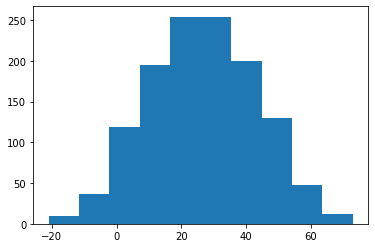

In [260]:
plt.hist(main_df['FD_Pts'])

In [262]:
main_df[main_df['Name'] == 'Connor Seabold'].T

,973,773,902
Name,Connor Seabold,Connor Seabold,Connor Seabold
Team,BOS,BOS,BOS
W,0,0,0
ER,7,7,1
SO,7,2,4
H,9,9,6
BB,1,2,2
CG,0,0,0
HBP,1,1,0
ShO,0,0,0


In [263]:
main_df = main_df.sort_index()

In [264]:
main_df.head()

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Salary,QS,FD_Pts,DK_Pts
0,Tyler Anderson,LAD,1,0,3,2,1,0,0,0,...,17.0,5.1,111.6,98.0,29.2,336.0,9000.0,1,40,23.95
1,Zach Davies,ARI,0,0,3,4,2,0,0,0,...,19.0,7.6,112.5,79.0,31.6,250.0,8200.0,0,24,13.65
2,Kevin Gausman,TOR,0,0,5,6,0,0,0,0,...,24.0,7.7,116.6,121.0,38.9,311.0,10300.0,1,37,19.90
3,Triston McKenzie,CLE,1,0,8,2,1,0,0,0,...,33.0,10.3,112.9,126.0,39.4,320.0,NaN,1,58,36.20
4,Jesus Luzardo,MIA,1,0,6,1,1,0,0,0,...,7.0,9.2,111.6,33.0,43.4,76.0,NaN,1,49,30.55


In [265]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1262
Data columns (total 60 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1258 non-null   object        
 1   Team         1258 non-null   object        
 2   W            1258 non-null   int64         
 3   ER           1258 non-null   int64         
 4   SO           1258 non-null   int64         
 5   H            1258 non-null   int64         
 6   BB           1258 non-null   int64         
 7   CG           1258 non-null   int64         
 8   HBP          1258 non-null   int64         
 9   ShO          1258 non-null   int64         
 10  Date         1258 non-null   datetime64[ns]
 11  Outs         1258 non-null   int32         
 12  Team_Season  1243 non-null   object        
 13  GS           1258 non-null   float64       
 14  Outs_Season  1258 non-null   float64       
 15  CGS          1258 non-null   int32         
 16  NH    

In [266]:
main_df.iloc[117, :]

Name                   Janson Junk
Team                           LAA
W                                0
ER                               6
SO                               2
H                                5
BB                               2
CG                               0
HBP                              0
ShO                              0
Date           2022-08-04 00:00:00
Outs                             7
Team_Season                    LAA
GS                               1
Outs_Season                     18
CGS                              0
NH                               0
Position                         P
Team_FD                        LAA
Avg_Outs                        15
W_Season                         1
ERA                              0
CG_Season                        0
ShO_Season                       0
K/9                           13.5
BB/9                           1.5
K/BB                             9
HR/9                             0
K%                  

In [267]:
main_df['Position'] = 'P'

In [268]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1262
Data columns (total 60 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1258 non-null   object        
 1   Team         1258 non-null   object        
 2   W            1258 non-null   int64         
 3   ER           1258 non-null   int64         
 4   SO           1258 non-null   int64         
 5   H            1258 non-null   int64         
 6   BB           1258 non-null   int64         
 7   CG           1258 non-null   int64         
 8   HBP          1258 non-null   int64         
 9   ShO          1258 non-null   int64         
 10  Date         1258 non-null   datetime64[ns]
 11  Outs         1258 non-null   int32         
 12  Team_Season  1243 non-null   object        
 13  GS           1258 non-null   float64       
 14  Outs_Season  1258 non-null   float64       
 15  CGS          1258 non-null   int32         
 16  NH    

In [269]:
#We'll drop salary column because that's not needed to train the model, only when we create lineups in practice
#We also don't need Team_FD since we have two columns that indicate the team. 
#Keeping Team_Season because that could come in handy later
main_df.drop(columns = ['Salary', 'Team_FD'], inplace = True)

In [270]:
#One last look at everything before we made this into a csv
main_df.head()

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,QS,FD_Pts,DK_Pts
0,Tyler Anderson,LAD,1,0,3,2,1,0,0,0,...,16.8,17.0,5.1,111.6,98.0,29.2,336.0,1,40,23.95
1,Zach Davies,ARI,0,0,3,4,2,0,0,0,...,13.6,19.0,7.6,112.5,79.0,31.6,250.0,0,24,13.65
2,Kevin Gausman,TOR,0,0,5,6,0,0,0,0,...,10.7,24.0,7.7,116.6,121.0,38.9,311.0,1,37,19.90
3,Triston McKenzie,CLE,1,0,8,2,1,0,0,0,...,19.8,33.0,10.3,112.9,126.0,39.4,320.0,1,58,36.20
4,Jesus Luzardo,MIA,1,0,6,1,1,0,0,0,...,12.5,7.0,9.2,111.6,33.0,43.4,76.0,1,49,30.55


In [271]:
main_df.tail()

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,QS,FD_Pts,DK_Pts
1258,Zach Davies,ARI,0,4,3,4,3,0,0,0,...,13.3,14.0,6.9,112.5,63.0,30.9,204.0,0,15,7.30
1259,Noah Syndergaard,LAA,0,5,5,8,2,0,0,0,...,10.2,11.0,6.7,110.7,60.0,36.8,163.0,0,22,10.50
1260,Alex Faedo,DET,0,4,2,8,2,0,0,0,...,19.6,10.0,8.0,109.8,45.0,36.0,125.0,0,7,-0.25
1261,Jose Berrios,TOR,0,6,1,9,1,0,0,0,...,17.2,26.0,11.9,113.8,103.0,47.0,219.0,0,-3,-7.00
1262,Caleb Kilian,CHC,0,5,3,3,5,0,0,0,...,5.7,0.0,0.0,111.4,10.0,37.0,27.0,0,1,-3.55


In [282]:
main_df[main_df.isna().any(axis = 1)][['Name', 'Date']]

,Name,Date
95,Cole Ragans,2022-08-04
139,Tommy Henry,2022-08-03
155,Jacob deGrom,2022-08-02
243,Nick Neidert,2022-07-30
277,Bryan Garcia,2022-07-29
493,Domingo German,2022-07-21
543,Max Meyer,2022-07-16
598,Anibal Sanchez,2022-07-14
636,Chris Sale,2022-07-12
667,Hunter Gaddis,2022-08-05


In [272]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1262
Data columns (total 58 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1258 non-null   object        
 1   Team         1258 non-null   object        
 2   W            1258 non-null   int64         
 3   ER           1258 non-null   int64         
 4   SO           1258 non-null   int64         
 5   H            1258 non-null   int64         
 6   BB           1258 non-null   int64         
 7   CG           1258 non-null   int64         
 8   HBP          1258 non-null   int64         
 9   ShO          1258 non-null   int64         
 10  Date         1258 non-null   datetime64[ns]
 11  Outs         1258 non-null   int32         
 12  Team_Season  1243 non-null   object        
 13  GS           1258 non-null   float64       
 14  Outs_Season  1258 non-null   float64       
 15  CGS          1258 non-null   int32         
 16  NH    

In [771]:
main_df = main_df.reset_index(drop = True)

In [772]:
main_df.tail()

,Name,Team,W,ER,SO,H,BB,CG,HBP,ShO,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,QS,FD_Pts,DK_Pts
1107,Zach Davies,ARI,0,4,3,4,3,0,0,0,...,13.3,14.0,6.9,112.5,63.0,30.9,204.0,0,15,7.30
1108,Noah Syndergaard,LAA,0,5,5,8,2,0,0,0,...,10.2,11.0,6.7,110.7,60.0,36.8,163.0,0,22,10.50
1109,Alex Faedo,DET,0,4,2,8,2,0,0,0,...,19.6,10.0,8.0,109.8,45.0,36.0,125.0,0,7,-0.25
1110,Jose Berrios,TOR,0,6,1,9,1,0,0,0,...,17.2,26.0,11.9,113.8,103.0,47.0,219.0,0,-3,-7.00
1111,Caleb Kilian,CHC,0,5,3,3,5,0,0,0,...,5.7,0.0,0.0,111.4,10.0,37.0,27.0,0,1,-3.55


In [773]:
#This variable will need to be customized to indicate the last date of data for the csv that we're creating
filename_date = today

In [533]:
yesterday = today - timedelta(days = 1)

In [534]:
yesterday_str = str(yesterday)

In [535]:
yesterday_str = yesterday_str.replace('-', '_')

In [536]:
yesterday_str

'2022_08_01'

In [283]:
#Changing the hyphens to underscores in yesterday_str in order to name the csv
filepath = r'C:\Users\Owner\FantasySports\MLB_DFS_2022\SP_Data_Wrangling_Through_2022_08_07.csv'
main_df.to_csv(filepath)

In [469]:
# list_of_dfs = []
# date_of_games = pd.to_datetime('20210427', format = '%Y%m%d')
# for i in range(121, 245, 4):
#     date_of_games = date_of_games + datetime.timedelta(days = 4)
#     if i == 193:
#         continue
#     L30_df = pd.read_csv("FG_Batters_Last30_" + str(i) + ".csv")
#     L30_df.drop(columns = ['Team', 'playerid', 'HR', '1B', '2B', '3B', 'RBI', 'R', 'BB', 'SB', 'HBP', 'H'], inplace = True)
#     games_df = pd.read_csv("FGBattersFP_" + str(i) + ".csv")
#     games_df = games_df[games_df['PA'] > 0]
#     games_df.rename(columns = {'PA':'PA_Game'}, inplace = True)
#     new_df = pd.merge(games_df, L30_df, how = 'left', on = 'Name')
#     new_df.insert(0, 'Date', date_of_games)
#     list_of_dfs.append(new_df)

In [ ]:
#Team Batting Stats vs. each hand

In [15]:
TeamVsLHP_df = pd.read_csv('TeamBattingVs_LHP_2022_06_23.csv')

In [19]:
TeamVsLHP_df['Hand'] = 'LHP'

In [20]:
TeamVsLHP_df.head()

,Unnamed: 0,Team,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,...,GB/FB,LD%,GB%,FB%,HR/FB,Soft%,Med%,Hard%,Date,Hand
0,0,CHW,7.6%,22.0%,0.35,0.352,0.476,0.828,0.180,0.355,...,1.28,19.7%,45.1%,35.2%,14.2%,15.9%,52.9%,31.3%,2022-06-23,LHP
1,1,ATL,9.8%,24.2%,0.41,0.333,0.479,0.812,0.218,0.312,...,1.13,19.8%,42.6%,37.6%,16.0%,15.4%,48.0%,36.6%,2022-06-23,LHP
2,2,COL,8.1%,19.1%,0.42,0.354,0.443,0.797,0.154,0.345,...,1.38,22.1%,45.2%,32.7%,9.6%,15.6%,57.8%,26.5%,2022-06-23,LHP
3,3,TOR,10.3%,19.1%,0.54,0.350,0.450,0.800,0.180,0.309,...,1.43,21.5%,46.2%,32.4%,14.5%,14.2%,50.9%,34.9%,2022-06-23,LHP
4,4,PHI,10.0%,22.9%,0.44,0.335,0.438,0.773,0.185,0.304,...,1.08,22.0%,40.5%,37.5%,13.7%,15.2%,56.0%,28.9%,2022-06-23,LHP


In [21]:
TeamVsLHP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Team        30 non-null     object 
 2   BB%         30 non-null     object 
 3   K%          30 non-null     object 
 4   BB/K        30 non-null     float64
 5   OBP         30 non-null     float64
 6   SLG         30 non-null     float64
 7   OPS         30 non-null     float64
 8   ISO         30 non-null     float64
 9   BABIP       30 non-null     float64
 10  wRC         30 non-null     int64  
 11  wRAA        30 non-null     float64
 12  wOBA        30 non-null     float64
 13  wRC+        30 non-null     int64  
 14  GB/FB       30 non-null     float64
 15  LD%         30 non-null     object 
 16  GB%         30 non-null     object 
 17  FB%         30 non-null     object 
 18  HR/FB       30 non-null     object 
 19  Soft%       30 non-null     obj

In [12]:
#SP_Stats
SP_stats_df = pd.read_csv('SPStats_2022_06_23.csv')

In [13]:
SP_stats_df.head()

,Unnamed: 0,Name,Team,W,ERA,GS,CG,ShO,IP,K/9,...,CStr%,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,Date
0,0,Tommy Hunter,NYM,0,0.0,0,0,0,3.0,12.00,...,13.2%,89.8,7.2,1,14.3%,101.1,2,28.6%,7,2022-06-23
1,1,Sean Doolittle,WSN,0,0.0,0,0,0,5.1,10.13,...,18.2%,95.6,24.7,1,9.1%,108.0,7,63.6%,11,2022-06-23
2,2,Charlie Culberson,TEX,0,0.0,0,0,0,1.0,0.00,...,9.1%,84.9,24.4,0,0.0%,93.8,0,0.0%,3,2022-06-23
3,3,Ehire Adrianza,WSN,0,0.0,0,0,0,1.0,9.00,...,16.7%,88.7,42.7,0,0.0%,89.5,0,0.0%,2,2022-06-23
4,4,Christian Bethancourt,OAK,0,0.0,0,0,0,1.0,0.00,...,0.0%,97.2,11.9,0,0.0%,101.6,2,66.7%,3,2022-06-23


In [6]:
SP_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  711 non-null    int64  
 1   Name        711 non-null    object 
 2   Team        711 non-null    object 
 3   W           711 non-null    int64  
 4   ERA         711 non-null    float64
 5   GS          711 non-null    int64  
 6   CG          711 non-null    int64  
 7   ShO         711 non-null    int64  
 8   IP          711 non-null    float64
 9   K/9         711 non-null    float64
 10  BB/9        711 non-null    float64
 11  K/BB        711 non-null    float64
 12  HR/9        711 non-null    float64
 13  K%          711 non-null    object 
 14  BB%         711 non-null    object 
 15  AVG         711 non-null    float64
 16  BABIP       711 non-null    float64
 17  FIP         711 non-null    float64
 18  xFIP        711 non-null    float64
 19  SIERA       711 non-null    f